# Exámen Diplomatura Ciencia de Datos 3º Bimestre

Este primer notebook contiene el código hasta el armado del df_final usado para el preprocesamiento de datos

## Datos del Grupo

Nombre y Apellido | LU
------------------|---
CROMBERG JAVIER EUGENIO | 1153099
CRUZ PINEDA FABIAN | 1099002
GARCIA CAROLINA | 1157796
GIULIANO AUGUSTO | 1157378
INZA ROBERTO | 1151488
URRACO EZEQUIEL| 1159531

---



# TP Predicción de abandono de clientes
# 1. Introducción

En la actualidad el poder de la información puede aplicarse, en cierta medida,  a la predicción de ciertas actividades humanas. Un campo de especial interés es aplicado al flujo de clientes y la posibilidad de predecir la deserción de los mismos, en este caso de un banco. 

Los modelos de machine learning (ML) pueden ayudar en este sentido mediante diferentes algoritmos predictivos, en este caso de clasificación. Los bancos focalizan su atención en el comportamiento de sus clientes; de no estar seguros de su permanencia en corto o mediano plazo, podrían implementar campañas que intenten retener a dicho cliente el mayor tiempo posbile. 

El objetivo de este estudio es desarrollar un modelo que ofrezca una predicción significativa de la deserción de clientes en una nómina de clientes de un banco.

Para lo cual contamos con un dataset con las caracteristicas de clientes de un banco con su performance entre el 2013 y abril de 2014. El objetivo del presente análisis es el de tratar de predecir la posibilidad de que un cliente dado cancele su cuenta bancaria con dos meses de anticipación.

Comenzamos por definir el PAC (Perfil Analítico de Clientes), que consiste en una serie de variables que caracterizan a los clientes. 

En este caso, se utiliza una combinación de variables demográficas y de comportamiento.
Las variables demográficas incluyen el en este caso la edad. 

Las variables de comportamiento
- tiempo que el cliente ha permanecido en el banco
- saldo total del cliente
- número de productos que tiene con el banco
- caracterizaciones de la cantidad de dinero que el cliente ha movido en el pasado reciente
- cantidad de dinero transferido cada mes
- número de transacciones realizadas por la banca móvil en comparación con el número de transacciones realizadas en una oficina bancaria física


Basado en estas variables, un Modelo de predicción de Deserción se construye con vistas predecir si un cliente dejará de ser cliente del banco en los próximos 2 meses. 

Pasos a seguir en la construcción del modelo
1.	Analizar las variables aportadas por el dataset que permitar establecer el perfil.
2.	Realizar un análisis C estadístico básicos de los datos como distribuciones, histogramas, detección atípica, etc.
3.	Seleccionar las variables relevantes que describan las características del cliente.
4.	Limpieza y transformación de los datos (eliminación de valores nulos, y atípicos, reescalado, discretización, etc.)

A partir de un primer análisis se implementarán distintos modelos de análisis:
1.	Modelos descriptivos describen los patrones subyacentes y las relaciones en los datos.
2.	Los modelos predictivos predicen el comportamiento futuro basándose en datos históricos y experiencias pasadas.
3.	Los modelos prescriptivos van más allá de la predicción de resultados futuros, sugiriendo también acciones para beneficiarse de las predicciones y mostrando las implicaciones de cada opción de decisión.
 
Por ende, se analizan los tipos y cantidad de productos que posee el cliente, sus balances, etc, y todos ellos son utilizado para definir el perfil del cliente.

En definitiva, el mejor modelo de predicción de deserción no sería el que tiene la mayor precisión estadística, sino el que proporciona las mejores ideas para prevenir aún más el comportamiento del cliente que va a abandonar el banco.

# 2. Dataset
El dataset utilizado en la presente análisis nos fue provisto por los docentes de la materia, asi como la consigna y objetivo buscado. 

Se trata de un archivo .zip con los datos bancarios de una serie de clientes de la entidad. Movimientos de las cuentas, tarjetas de crédito, etc.

# 3. Preparación de los Datos para su uso


## 3.1 Librerias

In [ ]:
from datetime import datetime
inicial_date = datetime.now()

# Librerias básicas
import pandas as pd
import numpy as np
from scipy.stats import iqr
from collections import Counter

# Libreria de visiaulización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
from matplotlib.colors import ListedColormap

# Asociadas con la creacion del modelo
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold,GridSearchCV
import sklearn.metrics #import precision_recall_curve, accuracy_score,roc_auc_score, auc, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report,precision_score,recall_score,RocCurveDisplay,get_scorer_names, log_loss
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, SelectPercentile, RFE, chi2, f_classif, f_regression
#import category_encoders as ce

# Modelos / Algoritmos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Librerías para Análisis Estadístico
from scipy import stats
import statsmodels.stats as sm
import statsmodels.api as sma
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import fisher_exact, chi2_contingency


## 3.2 Carga de Datos

In [ ]:
# Permite la visualización de todas las columnas
pd.options.display.max_columns = None

In [ ]:
# Para ingresar a traves de colab

from google.colab import drive
drive.mount('/content/drive')

url = "/content/drive/My Drive/DataScience/Banco/MESES_201402_201404.csv" # csv recortado con los datos de uso por peso para leer en collab
#url = "/content/drive/My Drive/DataScience/Banco/MESES_hasta_201404.csv"
df = pd.read_csv(url, low_memory = False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Levanto el csv como un df de Pandas
# df contiene todos los datos 01-2013 a 04-2014

# df = pd.read_csv('MESES_hasta_201404.csv')#, low_memory = False)

## 3.3 Limpieza y Correción de Datos
### 3.3.1 Descubriendo nulos y corrigiendo tipo de dato

In [ ]:
# Presentación de los datos
print(f"El dataframe tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataframe tiene 549863 filas y 172 columnas.


In [ ]:
df.head()

,Unnamed: 0,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,tplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,tfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,ttitulos,mtitulos,tseguro_vida_mercado_abierto,tseguro_auto,tseguro_vivienda,tseguro_accidentes_personales,tcaja_seguridad,mbonos_gobierno,mmonedas_extranjeras,minversiones_otras,tplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,tcuenta_debitos_automaticos,mcuenta_debitos_automaticos,ttarjeta_visa_debitos_automatico,mttarjeta_visa_debitos_automatic,ttarjeta_master_debitos_automati,mttarjeta_master_debitos_automat,tpagodeservicios,mpagodeservicios,tpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccuenta_descuentos,mcuenta_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_consultas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_Fvencimiento,Master_Finiciomora,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,target,target_bin
0,5,3333,201403,.,0,455,0,0,16109631.53,-1.253631e+08,2362829.57,-2333351.97,14082755.35,0,S,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,N,0.00,0.0,0.0,0.00,0.00,N,0,0.0,N,0,0.00,N,0,0.0,0,0.0,0,0.0,0,0.0,N,0.0,0.0,N,0.0,0.0,N,0.0,N,N,N,N,N,0,0,0,N,0.0,0.0,0,N,0,N,0,N,0,N,0,N,0,0,0.0,0,0.0,0,0.0,0,0,0,0.00,0,0.00,N,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,N,0,N,0,N,0,N,N,N,N,N,0,0.0,0,0.0,N,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,Continua,0
1,6,3333,201403,.,0,455,0,0

In [ ]:
# Drop de filas con numero_de_cliente = 3333 con datos erroneos
df_idx=df[df["numero_de_cliente"]==3333].index
df=df.drop(df_idx)

### a. Creación de la variable Target

In [ ]:
# Filtro los 3 últimos meses
df2=df[df.foto_mes > 201401]
df2.head()

,Unnamed: 0,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,tplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,tfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,ttitulos,mtitulos,tseguro_vida_mercado_abierto,tseguro_auto,tseguro_vivienda,tseguro_accidentes_personales,tcaja_seguridad,mbonos_gobierno,mmonedas_extranjeras,minversiones_otras,tplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,tcuenta_debitos_automaticos,mcuenta_debitos_automaticos,ttarjeta_visa_debitos_automatico,mttarjeta_visa_debitos_automatic,ttarjeta_master_debitos_automati,mttarjeta_master_debitos_automat,tpagodeservicios,mpagodeservicios,tpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccuenta_descuentos,mcuenta_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_consultas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_Fvencimiento,Master_Finiciomora,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,target,target_bin
4,22,5609788,201402,0,0,224,61,237,0.00,9669.42,0.00,0.00,0.00,8,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,2306.92,0.0,0.0,1.17,1214.93,S,0,0.0,S,12,5488.64,S,5,5844.80,0,0.0,0,0.0,0,0.0,N,0.0,0.0,N,0.0,0.0,N,0.0,N,N,N,N,N,0,0,0,N,0.0,0.0,0,N,0,S,225.14,N,0,N,0,N,0,0,0.0,2,0.0,0,0.0,0,0,1,328.53,5,525.66,N,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,N,0,N,0,N,0,S,N,S,N,N,0,0.0,0,0.0,S,0,10,86544.25,20170331,NaN,5930,5930,0,0,0,96162.31,0,0,20140213,5930,-2696.97,0,20010227,0,N,N,3006.9,0,10,87488.34,20220331,NaN,47

In [ ]:
# Creo un lag (lo voy a usar para crear la variable objetivo)
df2['Mes_1'] = df.groupby(['numero_de_cliente'])['foto_mes'].shift(-1)
df2['Mes_2'] = df.groupby(['numero_de_cliente'])['foto_mes'].shift(-2)

In [ ]:
# Verifico el formato de la tabla
df2[['numero_de_cliente', 'foto_mes', 'Mes_1', 'Mes_2']].head(10)

,numero_de_cliente,foto_mes,Mes_1,Mes_2
4,5609788,201402,201403.0,201404.0
5,5609788,201403,201404.0,NaN
6,5609788,201404,NaN,NaN
7,5609981,201402,201403.0,201404.0
8,5609981,201403,201404.0,NaN
9,5609981,201404,NaN,NaN
10,5610023,201402,201403.0,201404.0
11,5610023,201403,201404.0,NaN
12,5610023,201404,NaN,NaN
13,5610089,201402,201403.0,201404.0


In [ ]:
df2['target'] = "Baja+1"

In [ ]:
df2.loc[(df2['Mes_1']==201403), 'target'] = "Baja+2"

In [ ]:
df2.loc[(df2['Mes_2']==201404), 'target'] = "Continua"

In [ ]:
df2['target_bin'] = np.where(df2['target']=='Baja+2', 1, 0)

In [ ]:
df2[df2['target']=='Baja+2'] 

,Unnamed: 0,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,tplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,tfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,ttitulos,mtitulos,tseguro_vida_mercado_abierto,tseguro_auto,tseguro_vivienda,tseguro_accidentes_personales,tcaja_seguridad,mbonos_gobierno,mmonedas_extranjeras,minversiones_otras,tplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,tcuenta_debitos_automaticos,mcuenta_debitos_automaticos,ttarjeta_visa_debitos_automatico,mttarjeta_visa_debitos_automatic,ttarjeta_master_debitos_automati,mttarjeta_master_debitos_automat,tpagodeservicios,mpagodeservicios,tpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccuenta_descuentos,mcuenta_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_consultas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_Fvencimiento,Master_Finiciomora,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,target,target_bin,Mes_1,Mes_2
281,1420,5620030,201402,0,0,113,55,237,0.00,16293.40,0.0,0.0,0.0,2,S,N,N,N,N,N,N,N,N,S,N,0.0,0.00,0.0,S,0.00,68099.07,0.00,0.00,66733.67,S,2,418.86,N,0,0.00,N,0,0.0,0,0.00,0,0.0,0,0.0,N,0.0,0.0,N,0.0,0.0,N,0.00,N,N,N,N,N,0,0,0,N,0.0,0.0,0,S,5188.38,N,0,N,0,N,0,S,713.37,0,11.10,0,0.0,0,0.0,0,0,1,63.06,2,11.66,N,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,N,0,N,0,N,0,N,N,N,N,N,0,0.0,0,0.0,S,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,Baja+2,1,201403.0,N

In [ ]:
df2[df2['target_bin']==1] 

,Unnamed: 0,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,tplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,tfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,ttitulos,mtitulos,tseguro_vida_mercado_abierto,tseguro_auto,tseguro_vivienda,tseguro_accidentes_personales,tcaja_seguridad,mbonos_gobierno,mmonedas_extranjeras,minversiones_otras,tplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,tcuenta_debitos_automaticos,mcuenta_debitos_automaticos,ttarjeta_visa_debitos_automatico,mttarjeta_visa_debitos_automatic,ttarjeta_master_debitos_automati,mttarjeta_master_debitos_automat,tpagodeservicios,mpagodeservicios,tpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccuenta_descuentos,mcuenta_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_consultas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_Fvencimiento,Master_Finiciomora,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,target,target_bin,Mes_1,Mes_2
281,1420,5620030,201402,0,0,113,55,237,0.00,16293.40,0.0,0.0,0.0,2,S,N,N,N,N,N,N,N,N,S,N,0.0,0.00,0.0,S,0.00,68099.07,0.00,0.00,66733.67,S,2,418.86,N,0,0.00,N,0,0.0,0,0.00,0,0.0,0,0.0,N,0.0,0.0,N,0.0,0.0,N,0.00,N,N,N,N,N,0,0,0,N,0.0,0.0,0,S,5188.38,N,0,N,0,N,0,S,713.37,0,11.10,0,0.0,0,0.0,0,0,1,63.06,2,11.66,N,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,N,0,N,0,N,0,N,N,N,N,N,0,0.0,0,0.0,S,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,Baja+2,1,201403.0,N

In [ ]:
df2[['numero_de_cliente', 'foto_mes', 'Mes_1', 'Mes_2', 'target', 'target_bin']].head(20)

,numero_de_cliente,foto_mes,Mes_1,Mes_2,target,target_bin
4,5609788,201402,201403.0,201404.0,Continua,0
5,5609788,201403,201404.0,NaN,Baja+1,0
6,5609788,201404,NaN,NaN,Baja+1,0
7,5609981,201402,201403.0,201404.0,Continua,0
8,5609981,201403,201404.0,NaN,Baja+1,0
9,5609981,201404,NaN,NaN,Baja+1,0
10,5610023,201402,201403.0,201404.0,Continua,0
11,5610023,201403,201404.0,NaN,Baja+1,0
12,5610023,201404,NaN,NaN,Baja+1,0
13,5610089,201402,201403.0,201404.0,Continua,0


In [ ]:
df2 = df2.drop(['Mes_1' , 'Mes_2'] , axis='columns')

In [ ]:
df2["target_bin"].unique()

array([0, 1])

In [ ]:
df2["target_bin"].isna().sum()

0

### b. Análisis del df

In [ ]:
df2.dtypes

Unnamed: 0                         int64
numero_de_cliente                  int64
foto_mes                           int64
marketing_activo_ultimos90dias    object
cliente_vip                        int64
                                   ...  
Visa_tconsumos                    object
Visa_tadelantosefectivo           object
Visa_mpagominimo                  object
target                            object
target_bin                         int64
Length: 172, dtype: object

In [ ]:
df2.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [ ]:
df2.shape

(549859, 172)

In [ ]:
df2.columns

Index(['Unnamed: 0', 'numero_de_cliente', 'foto_mes',
       'marketing_activo_ultimos90dias', 'cliente_vip', 'cliente_sucursal',
       'cliente_edad', 'cliente_antiguedad', 'mrentabilidad',
       'mrentabilidad_annual',
       ...
       'Visa_mpagado', 'Visa_mpagospesos', 'Visa_mpagosdolares',
       'Visa_fechaalta', 'Visa_mconsumototal', 'Visa_tconsumos',
       'Visa_tadelantosefectivo', 'Visa_mpagominimo', 'target', 'target_bin'],
      dtype='object', length=172)

Listado de campos. Más allá de una somera descripción del campo y tipo de dato, se deja consignado la necesidad de su procesamiento.  

- `numero_de_cliente` - OK
    - id del cliente
- `foto_mes` - OK
    - Año y mes, codificado como un número con 4 dígitos para el año seguido de dos dígitos para el mes 
- `marketing_activo_ultimos90dias` - Arreglado
    - Valor booleano, representa si al cliente se le hizo una propaganda de markenting en los último 90 días
    - Arreglar array(['.', '0', '1', 1, 0], dtype=object)    
- `cliente_vip` - OK
    - Valor booleano, representa si el cliente es VIP o no
- `cliente_sucursal` - OK
    - - Valor numérico, representa el número de la sucursal a la que pertenece el cliente
- `cliente_edad` - Arreglar
    - Valor numerico
    - Incluye edad = 0 y outliers por encima de los 100 años??
    - array([  0,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 107, 108])
- `cliente_antiguedad` - oK
    - Valor numerico, la permanencia del cliente en la entidad
    - array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 255, 256, 257, 290, 291, 292])
- `mrentabilidad` - OK
    -  Monto rentabilidad, es un valor numérico, incluye valores negativos  
- `mrentabilidad_annual` - OK
    -  Monto rentabilidad anual, es un valor numérico, incluye valores negativos  
- `mcomisiones` - OK
    -  Monto comisiones, es un valor numérico, incluye valores negativos  
- `mactivos_margen` - OK
    - Campo numérico, incluye valores negativos
- `mpasivos_margen` - OK
    - Campo numérico, incluye valores negativos
- `marketing_coss_selling` - OK
    - Campo numérico
- `tpaquete_premium` - OK - Dropear?
    - Si bien es un campo que no posee nulos, sólo incluye un valor: 'S'
    - Motivo por el cual no se debería tomar en cuenta para el análisis?
- `tpaquete2`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `tpaquete3` - `Dropear?`
    - Si bien es un campo que no posee nulos, sólo incluye un valor: 'N'
    - Motivo por el cual no se deberíatomar en cuenta para el análisis
- `tpaquete4`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `tpaquete5` - `Dropear?`
    - Si bien es un campo que no posee nulos, sólo incluye un valor: 'N'
    - Motivo por el cual no se debería tomar en cuenta para el análisis
- `tpaquete6`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `tpaquete7`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'   
- `tpaquete8` - `Dropear?`
    - Si bien es un campo que no posee nulos, sólo incluye un valor: 'N'
    - Motivo por el cual no se debería tomar en cuenta para el análisis
- `tpaquete9`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'  
- `tcuentas`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'  
- `tcuenta_corriente`- OK
    - Tiene cuenta corriente?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'  
- `mcuenta_corriente_Nopaquete` - OK
    - Monto de la cuenta corriente que no es de un paquete
    - Campo numérico, incluye valores negativos
- `mcuenta_corriente_Paquete` - OK
    - Monto de la cuenta corriente que es de un paquete
    - Campo numérico, incluye valores negativos
- `mcuenta_corriente_dolares` - `Dropear?`
    - Si bien es un campo que no posee nulos, sólo incluye un valor: 0
    - Motivo por el cual no se debería tomar en cuenta para el análisis
- `tcaja_ahorro`- OK
    - Tiene caja de ahorro?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N' 
- `mcaja_ahorro_Paquete` - OK
    - Monto de la cuenta corriente que no es de un paquete
    - Campo numérico, incluye valores negativos
- `mcaja_ahorro_Nopaquete` - OK
    - Monto de la cuenta corriente que no es de un paquete
    - Campo numérico, incluye valores negativos
- `mcaja_ahorro_dolares` - OK
    - Monto de la cuenta corriente que no es de un paquete
    - Campo numérico, incluye valores negativos
- `mdescubierto_preacordado`- OK - `Formatear?`
    - Monto descubierto preacordado
    - Es un campo numérico que no posee nulos
    - Incluye dos valores 0 y 1.17, se lo podria considerar como booleano (si está preacordado o no)
- `mcuentas_saldo` - OK
    - Monto del saldo de las cuentas
    - Campo numérico, incluye valores negativos
- `ttarjeta_debito`- OK
    - Tiene tarjeta de débito?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N' 
- `ctarjeta_debito_transacciones` - OK
    - Campo numérico, incluye valores del 0 al 183
- `mautoservicio` - OK
    - Monto del autoservicio ??
    - Campo numérico, incluye valores negativos
- `ttarjeta_visa`- OK
    - Tiene tarjeta Visa?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N' 
- `ctarjeta_visa_transacciones` - OK
    - Campo numérico, incluye valores del 0 al 296
- `mtarjeta_visa_consumo` - OK
    - Monto del saldo de las cuentas
    - Campo numérico, incluye valores negativos
- `ttarjeta_master`- OK
    - Tiene tarjeta Visa?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N' 
- `ctarjeta_master_transacciones` - OK
    - Campo numérico, incluye valores del 0 al 296
- `mtarjeta_master_consumo` - OK
    - Monto del saldo de las cuentas
    - Campo numérico, incluye valores negativos
- `cprestamos_personales` - OK
    - Campo numérico, incluye valores del 0 al 75
- `mprestamos_personales` - OK
    - Monto del prestamo personal
    - Campo numérico, incluye sólo valores positivos
- `cprestamos_prendarios` - OK
    - Campo numérico, incluye valores del 0 al 3
- `mprestamos_prendarios` - OK
    - Monto del prestamo personal
    - Campo numérico, incluye sólo valores positivos
- `cprestamos_hipotecarios` - OK
    - Campo numérico, incluye valores del 0 al 4
- `mprestamos_hipotecarios` - `Formatear a float`
    - Monto del prestamo personal
    - Campo objeto, incluye sólo valores positivos
- `tplazo_fijo`- OK
    - Tiene plazo fijo?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N' 
- `mplazo_fijo_dolares` - OK
    - Campo numérico, incluye valores positivos
- `mplazo_fijo_pesos` - OK
    - Campo numérico, incluye valores positivos
- `tfondos_comunes_inversion`- OK
    - Tiene fondos comunes inversion?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N' 
- `mfondos_comunes_inversion_pesos` - OK
    - Campo numérico, incluye valores positivos
- `mfondos_comunes_inversion_dolare` - OK
    - Campo numérico, incluye valores positivos
- `ttitulos`- OK
    - Tiene títulos?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N' 
- `mtitulos` - OK
    - Campo numérico, incluye valores positivos
- `tseguro_vida_mercado_abierto`- OK
    - Tiene títulos?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N' 
- `tseguro_auto`- OK
    - Tiene títulos?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N' 
- `tseguro_vivienda`- OK
    - Tiene títulos?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `tseguro_accidentes_personales`- OK
    - Tiene títulos?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `tcaja_seguridad`- OK
    - Tiene títulos?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `mbonos_gobierno` - OK - `Dropear?`
    - Campo numérico, incluye un único valor = 0
- `mmonedas_extranjeras` - OK - `Dropear?`
    - Campo numérico, incluye un único valor = 0
- `minversiones_otras` - OK - `Dropear?`
    - Campo numérico, incluye un único valor = 0
- `tplan_sueldo`- OK
    - Tiene plan sueldo?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `mplan_sueldo` - OK
    - Campo numérico, incluye valores positivos
- `mplan_sueldo_manual` - OK
    - Campo numérico, incluye valores negativos
- `cplan_sueldo_transaccion` - OK
    - Campo numérico, incluye valores del 0 al 3
- `tcuenta_debitos_automaticos`- OK
    - Tiene plan sueldo?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `mcuenta_debitos_automaticos` - `Formatear a float - Arreglar`
    - Monto de los débitos automáticos
    - Campo objeto, incluye sólo valores positivos 
    - Hay '.' a ver cómo tratarlo 
    - array(['.', '0', '0.01', ..., '9996.56', '9999.36', '9999.97'],
      dtype=object)
- `ttarjeta_visa_debitos_automatico`- OK
    - Tiene débitos automáticos en Visa?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `mttarjeta_visa_debitos_automatic` - `Formatear a float - Arreglar`
    - Monto de los débitos automáticos
    - Campo objeto, incluye sólo valores positivos 
    - Hay '.' a ver cómo tratarlo 
    - array(['.', '0', '0.01', ..., '9996.79', '9996.85', '9999.01'],
      dtype=object)
- `ttarjeta_master_debitos_automati`- OK
    - Tiene débitos automáticos en Visa?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `mttarjeta_master_debitos_automat` - `Formatear a float - Arreglar`
    - Monto de los débitos automáticos
    - Campo objeto, incluye sólo valores positivos 
    - Hay '.' a ver cómo tratarlo 
- `tpagodeservicios`- OK
    - Tiene pago de servicios?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `mpagodeservicios` - `Formatear a float - Arreglar`
    - Monto de los débitos automáticos
    - Campo objeto, incluye sólo valores positivos 
    - Hay '.' a ver cómo tratarlo 
- `tpagomiscuentas`- OK
    - Tiene PMC?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `mpagomiscuentas` - `Formatear a float - Arreglar`
    - Monto de los débitos automáticos
    - Campo objeto, incluye sólo valores positivos 
    - Hay '.' a ver cómo tratarlo 
- `ccajeros_propios_descuentos`- OK
  - Campo numérico, incluye valores del -1 al 110
- `mcajeros_propios_descuentos` - `Formatear a float - Arreglar`
    - Monto de los débitos automáticos
    - Campo objeto, incluye sólo valores positivos 
    - Hay '.' a ver cómo tratarlo 
- `ctarjeta_visa_descuentos`- OK
  - Campo numérico, incluye valores del -1 al 132
- `mtarjeta_visa_descuentos` - `Formatear a float - Arreglar`
    - Monto de los débitos automáticos
    - Campo objeto, incluye sólo valores positivos 
    - Hay '.' a ver cómo tratarlo 
- `ctarjeta_master_descuentos`- OK
  - Campo numérico, incluye valores negativos
- `mtarjeta_master_descuentos` - `Formatear a float - Arreglar`
    - Monto de los débitos automáticos
    - Campo objeto, incluye sólo valores positivos 
    - Hay '.' a ver cómo tratarlo 
- `ccuenta_descuentos`- OK - `Dropear?`
  - Campo numérico, incluye como único valor el 0
- `mcuenta_descuentos`- OK - `Dropear?`
  - Campo numérico, incluye como único valor el 0
- `ccomisiones_mantenimiento`- OK
  - Campo numérico, incluye valores del 0 al 28
- `mcomisiones_mantenimiento` - OK
    - Monto de las comisiones x mantenimiento
    - Campo numérico, incluye sólo valores positivos 
- `ccomisiones_otras`- OK
  - Campo numérico, incluye valores del 0 al 221
- `mcomisiones_otras` - OK
    - Monto de otras comisiones
    - Campo numéricos, incluye valores negativos
- `tcambio_monedas`- OK
    - Realizó cambio de monedas?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'   
- `ccambio_monedas_compra`- OK
  - Campo numérico, incluye valores correlativos del 0 al 6
- `mcambio_monedas_compra` - OK
    - Monto del cambio para compra de monedas
    - Campo numéricos, incluye valores negativos  
- `ccambio_monedas_venta`- OK
  - Campo numérico, incluye valores positivos
- `mcambio_monedas_venta` - OK
    - Monto del cambio para venta de monedas
    - Campo numéricos, incluye valores negativos  
- `ctransferencias_recibidas`- OK
  - Campo numérico, incluye valores positivos
- `mtransferencias_recibidas` - OK
    - Monto del cambio para transferencias recibidas
    - Campo numéricos, incluye valores negativos  
- `ctransferencias_emitidas`- OK
  - Campo numérico, incluye valores positivos
- `mtransferencias_emitidas` - OK
    - Monto del cambio para transferencias emitidas
    - Campo numéricos, incluye valores negativos  
- `cextraccion_autoservicio`- OK
  - Campo numérico, incluye valores positivos
- `mextraccion_autoservicio` - OK
    - Monto del cambio para extracción de autoservicio
    - Campo numéricos, incluye valores sólo positivos
- `ccheques_depositados`- OK
  - Campo numérico, incluye valores positivos
- `mcheques_depositados` - OK
    - Monto del cambio para cheques depositados
    - Campo numéricos, incluye valores sólo positivos
- `ccheques_emitidos`- OK
  - Campo numérico, incluye valores positivos
- `mcheques_emitidos` - OK
    - Monto del cambio para cheques emitidos
    - Campo numéricos, incluye valores sólo positivos
- `ccheques_depositados_rechazados`- OK
  - Campo numérico, incluye valores positivos
- `mcheques_depositados_rechazados` - OK
    - Monto del cambio para cheques depositados rechazados
    - Campo numéricos, incluye valores sólo positivos
- `ccheques_emitidos_rechazados`- OK
  - Campo numérico, incluye valores positivos
- `mcheques_emitidos_rechazados` - OK
    - Monto del cambio para cheques depositados rechazados
    - Campo numéricos, incluye valores sólo positivos
- `tcallcenter`- OK
    - Tiene call Center?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `ccallcenter_transacciones`- OK
  - Campo numérico, incluye valores positivos
- `thomebanking`- OK
    - Tiene Home Banking?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `chomebanking_transacciones`- OK
  - Campo numérico, incluye valores positivos
- `tautoservicio`- OK
    - Tiene Autoservicio?
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `cautoservicio_transacciones`- OK
  - Campo numérico, incluye valores positivos
- `tcajas`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `tcajas_consultas`- OK - Dropear
    - Es un campo que no posee nulos
    - Sólo incluye 'N'
- `tcajas_depositos`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `tcajas_extracciones`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `tcajas_otras`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `ccajeros_propio_transacciones`- OK
  - Campo numérico, incluye valores positivos
- `mcajeros_propio` - OK
    - Campo numéricos, incluye valores sólo positivos
- `ccajeros_ajenos_transacciones`- OK
  - Campo numérico, incluye valores positivos
- `mcajeros_ajenos` - OK
    - Campo numéricos, incluye valores sólo positivos
- `tmovimientos_ultimos90dias`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'
- `Master_marca_atraso` - `Formatear a float - Arreglar`
    - Marca de atraso
    - Campo objeto, incluye 0 y 1
    - Pero hay '.' a ver cómo tratarlo 
- `Master_cuenta_estado` - Formatear a float - Arreglar
    - Cuenta estado (?)
    - Campo objeto, incluye números positivos
    - Pero hay '.' a ver cómo tratarlo 
- `Master_mfinanciacion_limite` - `Formatear a float - Arreglar`
    - Límite de monto a financiar
    - Campo objeto, incluye valores sólo positivos
    - Pero hay '.' a ver cómo tratarlo 
- `Master_Fvencimiento` - OK
    - Año y mes, codificado como un número con 4 dígitos para el año seguido de dos dígitos para el mes y dos para el día 
- `Master_Finiciomora`- `Arreglar o Dropear`
  - Campo numérico, incluye como único valor 2
  - Incluye 545643 valores NaN
- `Master_msaldototal` - `Arreglar`
    - Monto del saldo total
    - Campo objeto, incluye valores negativos  
    - Pero hay '.' a ver cómo tratarlo     
- `Master_msaldopesos` - `Arreglar`
    - Monto del saldo total
    - Campo objeto, incluye valores negativos  
    - Pero hay '.' a ver cómo tratarlo 
- `Master_msaldodolares` - `Arreglar`
    - Monto del saldo total
    - Campo objeto, incluye valores negativos  
    - Pero hay '.' a ver cómo tratarlo  
- `Master_mconsumospesos` - `Arreglar`
    - Monto del saldo total
    - Campo objeto, incluye valores negativos  
    - Pero hay '.' a ver cómo tratarlo   
- `Master_mconsumosdolares` - `Arreglar`
    - Monto del consumo en dolares
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Master_mlimitecompra` - `Arreglar`
    - Monto del límite de compra
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Master_madelantopesos` - `Arreglar`
    - Monto del adelanto en pesos
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Master_madelantodolares` - `Arreglar`
    - Monto del adelanto en pesos
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Master_fultimo_cierre` - `Arreglar`
    - Año y mes, codificado como un número con 4 dígitos para el año seguido de dos dígitos para el mes y dos para el día 
    - Pero hay '.' a ver cómo tratarlo 
- `Master_mpagado` - `Arreglar`
    - Monto pagado
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Master_mpagospesos` - `Arreglar`
    - Monto pagado en pesos
    - Campo objeto, incluye valores negativos  
- `Master_mpagosdolares` - `Arreglar`
    - Monto pagado
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Master_fechaalta` - `Arreglar`
    - Año y mes, codificado como un número con 4 dígitos para el año seguido de dos dígitos para el mes y dos para el día 
    - Pero hay '.' a ver cómo tratarlo 
- `Master_mconsumototal` - `Arreglar`
    - Monto consumo total
    - Campo objeto, incluye valores negativos 
- `Master_tconsumos`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'    
- `Master_tadelantosefectivo`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N' 
- `Master_mpagominimo` - `Arreglar`
    - Monto pago mínimo
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_marca_atraso` - `Formatear a float - Arreglar`
    - Marca de atraso
    - Campo objeto, incluye 0 y 1
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_cuenta_estado` - `Formatear a float - Arreglar`
    - Cuenta estado (?)
    - Campo objeto, incluye números positivos
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_mfinanciacion_limite` - `Formatear a float - Arreglar`
    - Límite de monto a financiar
    - Campo objeto, incluye valores sólo positivos
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_Fvencimiento` - OK
    - Año y mes, codificado como un número con 4 dígitos para el año seguido de dos dígitos para el mes y dos para el día 
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_Finiciomora`- `Arreglar o Dropear`
  - Campo numérico, incluye como único valor 2
  - Incluye 545004 valores NaN
- `Visa_msaldototal` - `Arreglar`
    - Monto del saldo total
    - Campo objeto, incluye valores negativos  
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_msaldopesos` - `Arreglar`
    - Monto del saldo en pesos
    - Campo objeto, incluye valores negativos   
- `Visa_msaldodolares` - `Arreglar`
    - Monto del saldo en dolares
    - Campo objeto, incluye valores negativos   
- `Visa_mconsumospesos` - `Arreglar`
    - Monto del saldo en dolares
    - Campo objeto, incluye valores negativos 
- `Visa_mconsumosdolares` - `Arreglar`
    - Monto del consumo en dolares
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_mlimitecompra` - `Arreglar`
    - Monto del límite de compra
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_madelantopesos` - `Arreglar`
    - Monto del adelanto en pesos
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_madelantodolares` - `Arreglar`
    - Monto del adelanto en pesos
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_fultimo_cierre` - `Arreglar`
    - Año y mes, codificado como un número con 4 dígitos para el año seguido de dos dígitos para el mes y dos para el día 
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_mpagado` - `Arreglar`
    - Monto pagado
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_mpagospesos` - `Arreglar`
    - Monto pagado en pesos
    - Campo objeto, incluye valores negativos  
- `Visa_mpagosdolares` - `Arreglar`
    - Monto pagado
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_fechaalta` - `Arreglar`
    - Año y mes, codificado como un número con 4 dígitos para el año seguido de dos dígitos para el mes y dos para el día 
    - Pero hay '.' a ver cómo tratarlo 
- `Visa_mconsumototal` - `Arreglar`
    - Monto consumo total
    - Campo objeto, incluye valores negativos 
- `Visa_tconsumos`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N'    
- `Visa_tadelantosefectivo`- OK
    - Es un campo que no posee nulos
    - Incluye 'S' y 'N' 
- `Visa_mpagominimo` - `Arreglar`
    - Monto pago mínimo
    - Campo objeto, incluye sólo valores positivos  
    - Pero hay '.' a ver cómo tratarlo 

#### Función para Visualización de valores únicos del df

In [ ]:
def unique_values(dataframe):
    for x in range(dataframe.shape[1]):
        print(dataframe.columns[x], "\n", np.sort(dataframe[dataframe.columns[x]].unique()), "\n")

### c. Corrección de Variables
#### 1. Variables Categóricas

In [ ]:
# Tres variables categóricas que serán utilizadas más adelante y no requieren procesamiento de datos

tres_categoricas = ["cliente_vip", "cliente_sucursal", "marketing_coss_selling"]

In [ ]:
# Estas variables son categóricas que se pasan a int para luego usar get_dummies

str_a_01 = ["tpaquete2", "tpaquete4", "tpaquete6", "tpaquete7", "tpaquete9",
            "tcuentas", "tcuenta_corriente", "tcaja_ahorro", "ttarjeta_debito", 
            "ttarjeta_visa", "ttarjeta_master", "tplazo_fijo", "tfondos_comunes_inversion", 
            "ttitulos", "tseguro_vida_mercado_abierto", "tseguro_auto", "tseguro_vivienda", 
            "tseguro_accidentes_personales", "tcaja_seguridad", "tplan_sueldo", "tcuenta_debitos_automaticos", 
            "ttarjeta_visa_debitos_automatico", "ttarjeta_master_debitos_automati", "tpagodeservicios", 
            "tpagomiscuentas", "tcambio_monedas", "tcallcenter", "thomebanking", "tautoservicio",
            "tcajas", "tcajas_depositos", "tcajas_extracciones", "tcajas_otras", "tmovimientos_ultimos90dias", 
            "Master_tconsumos", "Master_tadelantosefectivo", "Visa_tconsumos", "Visa_tadelantosefectivo"]
df2[str_a_01] = df2[str_a_01].replace({"N": 0, "S": 1}).astype("int")

In [ ]:
# Modificamos mdescubierto_preacordado a 0_1
df2['mdescubierto_preacordado'].unique()

array([1.17, 0.  ])

In [ ]:
df2['tdescubierto_preacordado'] = df2['mdescubierto_preacordado']
df2['tdescubierto_preacordado'] = df2['tdescubierto_preacordado'].replace({"N": 0, "S": 1.17}).astype("int")

# Lo agregamos a la lista str_a_01
str_a_01.append('tdescubierto_preacordado')

In [ ]:
# Utilizando esta función corroboro que no requiere ningún tratamiento de nulos.

unique_values(df2[str_a_01])

tpaquete2 
 [0 1] 

tpaquete4 
 [0 1] 

tpaquete6 
 [0 1] 

tpaquete7 
 [0 1] 

tpaquete9 
 [0 1] 

tcuentas 
 [0 1] 

tcuenta_corriente 
 [0 1] 

tcaja_ahorro 
 [0 1] 

ttarjeta_debito 
 [0 1] 

ttarjeta_visa 
 [0 1] 

ttarjeta_master 
 [0 1] 

tplazo_fijo 
 [0 1] 

tfondos_comunes_inversion 
 [0 1] 

ttitulos 
 [0 1] 

tseguro_vida_mercado_abierto 
 [0 1] 

tseguro_auto 
 [0 1] 

tseguro_vivienda 
 [0 1] 

tseguro_accidentes_personales 
 [0 1] 

tcaja_seguridad 
 [0 1] 

tplan_sueldo 
 [0 1] 

tcuenta_debitos_automaticos 
 [0 1] 

ttarjeta_visa_debitos_automatico 
 [0 1] 

ttarjeta_master_debitos_automati 
 [0 1] 

tpagodeservicios 
 [0 1] 

tpagomiscuentas 
 [0 1] 

tcambio_monedas 
 [0 1] 

tcallcenter 
 [0 1] 

thomebanking 
 [0 1] 

tautoservicio 
 [0 1] 

tcajas 
 [0 1] 

tcajas_depositos 
 [0 1] 

tcajas_extracciones 
 [0 1] 

tcajas_otras 
 [0 1] 

tmovimientos_ultimos90dias 
 [0 1] 

Master_tconsumos 
 [0 1] 

Master_tadelantosefectivo 
 [0 1] 

Visa_tconsumos 
 [0 1] 

Visa_

In [ ]:
# Tres variables son categóricas en las que se reemplazarán los "." por np.nan

str_con_nulos1 = ["marketing_activo_ultimos90dias", "Master_marca_atraso", "Visa_marca_atraso", "Visa_cuenta_estado", "Master_cuenta_estado"]

df2[str_con_nulos1] = df2[str_con_nulos1].replace({".": np.nan}).astype("float")

#### 2. Variables numéricas

In [ ]:
# Variables son numéricas que se pasa de str a float aunque contenga "."

num_con_nulos = ["mprestamos_hipotecarios", "mcuenta_debitos_automaticos", "mttarjeta_visa_debitos_automatic",
              "mttarjeta_master_debitos_automat", "mpagodeservicios", "mpagomiscuentas", "Master_mfinanciacion_limite",
                  "Master_msaldototal", "Master_msaldopesos", "Master_msaldodolares",
                  "Master_mconsumospesos", "Master_mconsumosdolares", "Master_mlimitecompra",
                  "Master_madelantopesos", "Master_madelantodolares", "Master_mpagado",
                  "Master_mpagospesos", "Master_mpagosdolares", "Master_mconsumototal", 
                  "Master_mpagominimo", "Visa_mfinanciacion_limite", "Visa_msaldototal",
                  "Visa_msaldopesos", "Visa_msaldodolares", "Visa_mconsumospesos",
                  "Visa_mconsumosdolares", "Visa_mlimitecompra", "Visa_madelantopesos",
                  "Visa_madelantodolares", "Visa_mpagado", "Visa_mpagospesos", "Visa_mpagosdolares",
                  "Visa_mconsumototal", "Visa_mpagominimo"]

df2[num_con_nulos] = df2[num_con_nulos].replace({".": np.nan}).astype("float")

In [ ]:
# Variables son numéricas que no contienen nulos

num_sin_nulos = ["cliente_edad", "cliente_antiguedad", "mrentabilidad", "mrentabilidad_annual", "mcomisiones",
                 "mactivos_margen", "mpasivos_margen", "mcuenta_corriente_Nopaquete", "mcuenta_corriente_Paquete",
                 "mcaja_ahorro_Paquete", "mcaja_ahorro_Nopaquete", "mcaja_ahorro_dolares", "mcuentas_saldo",
                 "ctarjeta_debito_transacciones", "mautoservicio", "ctarjeta_visa_transacciones", "mtarjeta_visa_consumo",
                 "ctarjeta_master_transacciones", "mtarjeta_master_consumo", "cprestamos_personales", "mprestamos_personales",
                 "cprestamos_prendarios", "mprestamos_prendarios", "cprestamos_hipotecarios", "mplazo_fijo_dolares",
                 "mplazo_fijo_pesos", "mfondos_comunes_inversion_pesos", "mfondos_comunes_inversion_dolare",
                 "mtitulos", "mplan_sueldo", "mplan_sueldo_manual", "cplan_sueldo_transaccion", "ccajeros_propios_descuentos",
                "mcajeros_propios_descuentos", "ctarjeta_visa_descuentos", "mtarjeta_visa_descuentos", "ctarjeta_master_descuentos",
                 "mtarjeta_master_descuentos", "ccomisiones_mantenimiento", "mcomisiones_mantenimiento", "ccomisiones_otras",
                 "mcomisiones_otras", "ccambio_monedas_compra", "mcambio_monedas_compra", "ccambio_monedas_venta",
                 "mcambio_monedas_venta", "ctransferencias_recibidas", "mtransferencias_recibidas", "ctransferencias_emitidas",
                 "mtransferencias_emitidas", "cextraccion_autoservicio", "mextraccion_autoservicio", "ccheques_depositados",
                 "mcheques_depositados", "ccheques_emitidos", "mcheques_emitidos", "ccheques_depositados_rechazados",
                 "mcheques_depositados_rechazados", "ccheques_emitidos_rechazados", "mcheques_emitidos_rechazados",
                 "ccallcenter_transacciones", "chomebanking_transacciones", "cautoservicio_transacciones", "ccajeros_propio_transacciones",
                 "mcajeros_propio", "ccajeros_ajenos_transacciones", "mcajeros_ajenos"] 

In [ ]:
df2[num_sin_nulos].isna().sum().sum()

0

#### 3. Variables datetime

In [ ]:
# Variables de tipo datetime a las que se les quita "." y se pasan a datetime

srt_a_fecha_pto = ["Master_Fvencimiento", "Master_fultimo_cierre", "Master_fechaalta",
                  "Visa_Fvencimiento", "Visa_fultimo_cierre", "Visa_fechaalta"]

df2[srt_a_fecha_pto] = df2[srt_a_fecha_pto].replace({".": np.nan})

In [ ]:
df2[srt_a_fecha_pto] = df2[srt_a_fecha_pto].apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%Y-%m-%d'))

In [ ]:
df2[srt_a_fecha_pto].dtypes

Master_Fvencimiento      datetime64[ns]
Master_fultimo_cierre    datetime64[ns]
Master_fechaalta         datetime64[ns]
Visa_Fvencimiento        datetime64[ns]
Visa_fultimo_cierre      datetime64[ns]
Visa_fechaalta           datetime64[ns]
dtype: object

### d. Drop de columnas

In [ ]:
borrar = ["foto_mes", "target", "tpaquete_premium", "tpaquete3", "tpaquete5", "tpaquete8", "tcajas_consultas", 
          "ccuenta_descuentos", "mcuenta_descuentos", "mcuenta_corriente_dolares", "mbonos_gobierno", "mmonedas_extranjeras", 
          "minversiones_otras", "Master_Finiciomora", "Visa_Finiciomora"]

df2 = df2.drop(borrar, axis = 1)

# Por ahora borro también las variables de datos tipo datetime

df2 = df2.drop(srt_a_fecha_pto, axis = 1)


### 3.3.2 Tratamiento de nulos

#### a. Eliminación según % de nulos en cada columna

In [ ]:
pct_nulos = (df2.isna().sum().sort_values(ascending = False) / df2.shape[0] * 100).head(10)
pct_nulos

Master_madelantodolares        47.180095
Master_mconsumototal           47.180095
Master_mconsumosdolares        47.180095
Master_madelantopesos          47.180095
Master_mpagospesos             47.180095
Master_mpagosdolares           47.180095
Master_mconsumospesos          47.180095
Master_msaldopesos             13.978311
Master_msaldodolares           13.978311
Master_mfinanciacion_limite    13.978311
dtype: float64

In [ ]:
# Se proceden a eliminar aquellas columnas con más del %15 de los datos nulos
columnas_nulas = []

for i in range(len(pct_nulos)):
    if pct_nulos.iloc[i] > 15:
        columnas_nulas.append(pct_nulos.index[i])

columnas_nulas

['Master_madelantodolares',
 'Master_mconsumototal',
 'Master_mconsumosdolares',
 'Master_madelantopesos',
 'Master_mpagospesos',
 'Master_mpagosdolares',
 'Master_mconsumospesos']

In [ ]:
df2 = df2.drop(columnas_nulas, axis = 1)

#### b. Eliminación cuando una fila tiene más de la mitad de su valores nulos

In [ ]:
df2.shape

(549859, 145)

In [ ]:
df2.isna().sum().sort_values(ascending = False)

Master_mlimitecompra        76861
Master_msaldototal          76861
Master_mpagominimo          76861
Master_mpagado              76861
Master_msaldodolares        76861
                            ...  
mprestamos_prendarios           0
cprestamos_prendarios           0
mprestamos_personales           0
cprestamos_personales           0
tdescubierto_preacordado        0
Length: 145, dtype: int64

In [ ]:
df2 = df2.dropna(axis = 0, thresh = 77)

In [ ]:
df2.isna().sum().sort_values(ascending = False)

Master_mlimitecompra        76861
Master_msaldototal          76861
Master_mpagominimo          76861
Master_mpagado              76861
Master_msaldodolares        76861
                            ...  
mprestamos_prendarios           0
cprestamos_prendarios           0
mprestamos_personales           0
cprestamos_personales           0
tdescubierto_preacordado        0
Length: 145, dtype: int64

`Aclaración` si bien no hubieron registros con más del 50% de los valores nulos, nos pareció importante que conste esta comprobación

#### c. Columnas object: reemplazo por la moda

In [ ]:
# Tomamos todas las listas con los nombres de las columnas con datos categóricos
col_categoricas = tres_categoricas + str_a_01 + str_con_nulos1

In [ ]:
unique_values(df2[col_categoricas])

cliente_vip 
 [0 1] 

cliente_sucursal 
 [   2   17   20   29   32   41   44   47   50   59   62   68   71   74
   77   80   89   95   98  101  104  107  110  113  116  119  125  128
  131  134  137  143  146  149  152  155  158  161  164  167  170  173
  176  179  182  185  194  200  203  206  209  215  218  221  224  227
  230  233  236  239  245  248  254  257  260  263  266  269  272  275
  281  284  287  293  299  302  305  308  314  323  326  329  332  338
  344  347  350  353  356  359  362  365  371  374  377  380  383  392
  395  398  401  407  422  425  434  440  443  446  449  452  455  458
  461  464  467  470  473  476  479  488  491  494  497  500  503  506
  509  512  518  521  524  527  530  536  539  542  545  548  557  560
  563  566  572  575  578  581  584  587  590  593  599  605  611  614
  617  620  623  626  629  632  638  650  653  656  665  668  677  680
  689  692  701  713  728  737  740  743  752  755  758  761  764  767
  770  782  785  788  794  797  800 

In [ ]:
# Visualizamos las columnas con valores nulos
df2[col_categoricas].isna().sum().sort_values(ascending = False).head(5)

Master_cuenta_estado    76861
Master_marca_atraso     76861
Visa_cuenta_estado      31826
Visa_marca_atraso       31826
tcajas_extracciones         0
dtype: int64

In [ ]:
# Eliminamos los valores nulos por la moda
for i in col_categoricas:
    df2[i] = df2[i].replace({np.nan: df2[i].mode()[0]})

In [ ]:
# Comprobamos que no quedan valores nulos
df2[col_categoricas].isna().sum().sort_values(ascending = False).head(5)

cliente_vip         0
tcajas_otras        0
tpagodeservicios    0
tpagomiscuentas     0
tcambio_monedas     0
dtype: int64

#### d. Columnas num: reemplazo por la media/mediana

In [ ]:
# Generamos una lista con las listas de nombres de columnas con valores numéricos hechas previamente
col_numericas = num_con_nulos + num_sin_nulos

In [ ]:
# Eliminamos los nombres de columnas nulas agrupadas en una lista previa de la lista col_numéricas 
for i in columnas_nulas:
    col_numericas.remove(i)

In [ ]:
# Visualizamos las columnas con valores nulos
df2.isna().sum().sort_values(ascending = False).head(28)

Master_mpagado                      76861
Master_mfinanciacion_limite         76861
Master_msaldototal                  76861
Master_msaldopesos                  76861
Master_msaldodolares                76861
Master_mlimitecompra                76861
Master_mpagominimo                  76861
Visa_mconsumototal                  62937
Visa_mpagosdolares                  62937
Visa_mpagospesos                    62937
Visa_madelantodolares               62937
Visa_madelantopesos                 62937
Visa_mconsumosdolares               62937
Visa_mconsumospesos                 62937
Visa_msaldopesos                    31826
Visa_msaldototal                    31826
Visa_mfinanciacion_limite           31826
Visa_msaldodolares                  31826
Visa_mpagado                        31826
Visa_mlimitecompra                  31826
Visa_mpagominimo                    31826
mttarjeta_visa_debitos_automatic    12669
mttarjeta_master_debitos_automat    12669
mcuenta_debitos_automaticos       

In [ ]:
# Eliminamos los valores nulos por la mediana
for i in col_numericas:
    df2[i] = df2[i].replace({np.nan: df2[i].median()})

In [ ]:
df2['cliente_edad'].describe()

count    549859.000000
mean         42.764796
std          17.995489
min           0.000000
25%          35.000000
50%          44.000000
75%          55.000000
max         108.000000
Name: cliente_edad, dtype: float64

In [ ]:
df2['cliente_edad'] = df2['cliente_edad'].replace({0: df2['cliente_edad'].median()})

In [ ]:
df2['cliente_edad'].describe()

count    549859.000000
mean         46.829918
std          11.768143
min          18.000000
25%          38.000000
50%          44.000000
75%          55.000000
max         108.000000
Name: cliente_edad, dtype: float64

In [ ]:
# Comprobamos que no quedan valores nulos
df2.isna().sum().sort_values(ascending = False).head(5)

Unnamed: 0                         0
mtarjeta_visa_descuentos           0
ccheques_emitidos                  0
mcheques_emitidos                  0
ccheques_depositados_rechazados    0
dtype: int64

In [ ]:
# Comprobación final
df2.isna().sum().sum()

0

## 3.4 Creamos Variables

In [ ]:
df3 = df2.copy()

In [ ]:
df3.columns

Index(['Unnamed: 0', 'numero_de_cliente', 'marketing_activo_ultimos90dias',
       'cliente_vip', 'cliente_sucursal', 'cliente_edad', 'cliente_antiguedad',
       'mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       ...
       'Visa_madelantodolares', 'Visa_mpagado', 'Visa_mpagospesos',
       'Visa_mpagosdolares', 'Visa_mconsumototal', 'Visa_tconsumos',
       'Visa_tadelantosefectivo', 'Visa_mpagominimo', 'target_bin',
       'tdescubierto_preacordado'],
      dtype='object', length=145)

In [ ]:
len(df3.columns)

145

**Analizamos todas las variables con el objetivo de UNIFICAR/CREAR variables**

In [ ]:
list(df3.columns)

['Unnamed: 0',
 'numero_de_cliente',
 'marketing_activo_ultimos90dias',
 'cliente_vip',
 'cliente_sucursal',
 'cliente_edad',
 'cliente_antiguedad',
 'mrentabilidad',
 'mrentabilidad_annual',
 'mcomisiones',
 'mactivos_margen',
 'mpasivos_margen',
 'marketing_coss_selling',
 'tpaquete2',
 'tpaquete4',
 'tpaquete6',
 'tpaquete7',
 'tpaquete9',
 'tcuentas',
 'tcuenta_corriente',
 'mcuenta_corriente_Nopaquete',
 'mcuenta_corriente_Paquete',
 'tcaja_ahorro',
 'mcaja_ahorro_Paquete',
 'mcaja_ahorro_Nopaquete',
 'mcaja_ahorro_dolares',
 'mdescubierto_preacordado',
 'mcuentas_saldo',
 'ttarjeta_debito',
 'ctarjeta_debito_transacciones',
 'mautoservicio',
 'ttarjeta_visa',
 'ctarjeta_visa_transacciones',
 'mtarjeta_visa_consumo',
 'ttarjeta_master',
 'ctarjeta_master_transacciones',
 'mtarjeta_master_consumo',
 'cprestamos_personales',
 'mprestamos_personales',
 'cprestamos_prendarios',
 'mprestamos_prendarios',
 'cprestamos_hipotecarios',
 'mprestamos_hipotecarios',
 'tplazo_fijo',
 'mplazo_f

In [ ]:
# Unificamos Campos de Caja de Ahorro y Cuenta corriente a sus totales 

df3["mcuenta_corriente_all"] = df3["mcuenta_corriente_Paquete"] + df3["mcuenta_corriente_Nopaquete"]
df3["mcaja_ahorro_all"] = df3["mcaja_ahorro_Paquete"] + df3["mcaja_ahorro_Nopaquete"]
df3["mcaja_ahorro_CC"] = df3["mcaja_ahorro_all"] + df3["mcuenta_corriente_all"]

In [ ]:
# Genero el drop

drop_1 = ["mcuenta_corriente_Paquete", "mcuenta_corriente_Nopaquete", "mcaja_ahorro_Paquete", "mcaja_ahorro_Nopaquete", "mcaja_ahorro_all", "mcuenta_corriente_all"]
df3 = df3.drop(drop_1, axis = 1)

In [ ]:
# Unificamos Campos de Consumo y Transacciones a sus totales 

df3["mtarjeta_all_consumo"] = df3["mtarjeta_visa_consumo"] + df3["mtarjeta_master_consumo"]
df3["ctarjeta_all_transacciones"] = df3["ctarjeta_visa_transacciones"] + df3["ctarjeta_master_transacciones"] + df3["ctarjeta_debito_transacciones"]

In [ ]:
# Genero el drop

drop_2 = ["mtarjeta_visa_consumo", "mtarjeta_master_consumo", "ctarjeta_visa_transacciones", "ctarjeta_master_transacciones"]
df3 = df3.drop(drop_2, axis = 1) 

In [ ]:
# Unificamos Campos de Prestamos a sus totales 

df3["cprestamos_all"] = df3["cprestamos_personales"] + df3["cprestamos_prendarios"] + df3["cprestamos_hipotecarios"]
df3["mprestamos_all"] = df3["mprestamos_personales"] + df3["mprestamos_prendarios"] + df3["mprestamos_hipotecarios"]

In [ ]:
# Genero el drop

drop_3 = ["cprestamos_personales", "cprestamos_prendarios", "cprestamos_hipotecarios", "mprestamos_personales", "mprestamos_prendarios", "mprestamos_hipotecarios"]
df3 = df3.drop(drop_3, axis = 1) 

In [ ]:
# Poner algún título

df3["renta_dolar"] = df3["mplazo_fijo_dolares"] + df3["mfondos_comunes_inversion_dolare"]
df3["renta_pesos"] = df3["mplazo_fijo_pesos"] + df3["mfondos_comunes_inversion_pesos"] + df3["mtitulos"]

In [ ]:
# Genero el drop

drop_4 = ["mplazo_fijo_dolares", "mfondos_comunes_inversion_dolare", "mplazo_fijo_pesos", "mfondos_comunes_inversion_pesos", "mtitulos"]
df3 = df3.drop(drop_4, axis = 1) 

In [ ]:
# Se unifica como "tpaquete"
# Si tiene algún paquete se pone un "1". Sino tiene ningún paquete se pone un 0

df3["tpaquete"] = np.where(df3[["tpaquete2", "tpaquete4", "tpaquete6", "tpaquete7", "tpaquete9"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_5 = ["tpaquete2", "tpaquete4", "tpaquete6", "tpaquete7", "tpaquete9"]
df3 = df3.drop(drop_5, axis = 1) 

In [ ]:
# Se unifica como "tcuenta"
# Al igual que con la variable "tpaquete generada arriba"

df3["tcuenta"] = np.where(df3[["tcuentas", "tcuenta_corriente", "tcaja_ahorro"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_6 = ["tcuentas", "tcuenta_corriente", "tcaja_ahorro"]
df3 = df3.drop(drop_6, axis = 1) 

In [ ]:
# Se unifica como "trenta"
# Al igual que con la variable "tcuenta" generada arriba

df3["trenta"] = np.where(df3[["tplazo_fijo", "tfondos_comunes_inversion", "ttitulos"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_7 = ["tplazo_fijo", "tfondos_comunes_inversion", "ttitulos"]
df3 = df3.drop(drop_7, axis = 1) 

In [ ]:
# Se unifica como "tseguro"
# Al igual que con la variable "trenta" generada arriba

df3["tseguro"] = np.where(df3[["tseguro_vida_mercado_abierto", "tseguro_auto", "tseguro_vivienda", "tseguro_accidentes_personales"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_8 = ["tseguro_vida_mercado_abierto", "tseguro_auto", "tseguro_vivienda", "tseguro_accidentes_personales"]
df3 = df3.drop(drop_8, axis = 1) 

In [ ]:
# Decidimos eliminar esta columna porque tiene baja varianza, ya que de 549.859 clientes hay 549.753 
# que tienen un valor de 0

df3["mplan_sueldo_manual"].value_counts().sort_values(ascending = False)

 0.00        549753
 3603.60          6
 3237.39          3
 2783.43          3
 4954.95          2
              ...  
-5675.67          1
 51319.71         1
-9520.29          1
 16922.88         1
 10010.52         1
Name: mplan_sueldo_manual, Length: 67, dtype: int64

In [ ]:
df3 = df3.drop("mplan_sueldo_manual", axis = 1)

In [ ]:
# Respecto a las siguientes 3 variables
    # ttarjeta_visa_debitos_automatico
    # ttarjeta_master_debitos_automati
    # tcuenta_debitos_automaticos
# Hay clientes que pueden NO tener visa/master pero si tener débitos automáticos, tal vez porque usan otra tarjeta, no lo sé
# Acá la demostración

mask_debitos_visa_master = (df3["ttarjeta_visa_debitos_automatico"] == 0) & (df3["ttarjeta_master_debitos_automati"] == 0) 
mask_debitos_otros = df3["tcuenta_debitos_automaticos"] == 1

# Le pido que me devuelva aquellos clientes que NO tienen ni visa ni master, pero SI otros débitos
# Con esta línea de código tan solo hay 43 clientes que abandonaron el banco.
df3[mask_debitos_visa_master & mask_debitos_otros]["target_bin"].sum()

43

In [ ]:
# Aplicando a la inversa, es decir clientes que SI tienen visa Y master, pero NO otros débitos
# Tampoco hay diferencias en cantidad de clientes que abandonaron el banco
# Remarco lo de que no hay diferencias en cuanto a la cantidad de clientes que abandonaron el banco para 
    # así poder unir las 3 variables junto con "tpagodeservicios" y "tpagomiscuentas" 
    # En una sola variable llamada "tdebitos_automaticos"

mask_debitos_visa_master = (df3["ttarjeta_visa_debitos_automatico"] == 1) & (df3["ttarjeta_master_debitos_automati"] == 1) 
mask_debitos_otros = df3["tcuenta_debitos_automaticos"] == 0

df3[mask_debitos_visa_master & mask_debitos_otros]["target_bin"].sum()

21

In [ ]:
tdebitos_automaticos = ["tcuenta_debitos_automaticos", "ttarjeta_visa_debitos_automatico", "ttarjeta_master_debitos_automati", "tpagodeservicios", "tpagomiscuentas"]
df3["tdebitos_automaticos"] = np.where(df3[tdebitos_automaticos].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_9 = ["tcuenta_debitos_automaticos", "ttarjeta_visa_debitos_automatico", "ttarjeta_master_debitos_automati", "tpagodeservicios", "tpagomiscuentas"]
df3 = df3.drop(drop_9, axis = 1)

In [ ]:
df3["mdebitos_automaticos"] = df3["mcuenta_debitos_automaticos"] + df3["mttarjeta_visa_debitos_automatic"] + df3["mttarjeta_master_debitos_automat"] + df3["mpagodeservicios"] + df3["mpagomiscuentas"] 

In [ ]:
# Genero el drop

drop_10 = ["mcuenta_debitos_automaticos", "mttarjeta_visa_debitos_automatic", "mttarjeta_master_debitos_automat", "mpagodeservicios", "mpagomiscuentas"]
df3 = df3.drop(drop_10, axis = 1)

In [ ]:
# VARIABLES RELACIONADAS CON TARJETA VISA
# LA INTENCION ES GENERAR UN HEATMAP Y ELIMINAR CORRELACIONES
# SOLO CON VARIABLES NUMERICAS

variables_visa = ['Visa_marca_atraso', 'Visa_cuenta_estado', 'Visa_mfinanciacion_limite', 'Visa_msaldototal', 'Visa_msaldopesos',
                   'Visa_msaldodolares', 'Visa_mconsumospesos', 'Visa_mconsumosdolares', 'Visa_mlimitecompra', 'Visa_madelantopesos',
                   'Visa_madelantodolares', 'Visa_mpagado', 'Visa_mpagospesos', 'Visa_mpagosdolares', 'Visa_mconsumototal', 'Visa_tconsumos',
                   'Visa_tadelantosefectivo', 'Visa_mpagominimo']

In [ ]:
# CORRO LA FUNCION PARA FIJARME QUÉ VARIABLES SON NUMÉRICAS
    # "Visa_marca_atraso", "Visa_cuenta_estado", "Visa_tconsumos", "Visa_tadelantosefectivo"
        # Estas variable son categóricas, por lo que no entran en el HEATMAP
unique_values(df3[variables_visa])

Visa_marca_atraso 
 [0. 1.] 

Visa_cuenta_estado 
 [10. 11. 12. 19.] 

Visa_mfinanciacion_limite 
 [0.00000000e+00 3.35790000e+02 4.20030000e+02 5.04270000e+02
 6.04890000e+02 6.14250000e+02 6.87960000e+02 7.05510000e+02
 7.37100000e+02 7.55820000e+02 8.23680000e+02 8.84520000e+02
 9.07920000e+02 1.05300000e+03 1.05885000e+03 1.09629000e+03
 1.22850000e+03 1.31625000e+03 1.53504000e+03 1.57950000e+03
 1.84275000e+03 1.97379000e+03 2.10600000e+03 2.14929000e+03
 2.36925000e+03 2.45700000e+03 2.58804000e+03 2.63250000e+03
 2.76354000e+03 3.07125000e+03 3.15900000e+03 3.51000000e+03
 3.62349000e+03 3.68550000e+03 3.94875000e+03 4.21200000e+03
 4.29975000e+03 4.54896000e+03 4.73850000e+03 5.26500000e+03
 5.30712000e+03 5.52825000e+03 6.14250000e+03 6.16005000e+03
 6.31800000e+03 6.63390000e+03 7.02000000e+03 7.18614000e+03
 7.37100000e+03 7.89750000e+03 8.21340000e+03 8.42400000e+03
 8.77500000e+03 9.47700000e+03 9.82800000e+03 1.02667500e+04
 1.05300000e+04 1.10565000e+04 1.17936000e+04 1

In [ ]:
visa = ['Visa_mfinanciacion_limite', 'Visa_msaldototal', 'Visa_msaldopesos', 'Visa_msaldodolares', 
        'Visa_mconsumospesos', 'Visa_mconsumosdolares', 'Visa_mlimitecompra', 'Visa_madelantopesos', 
        'Visa_madelantodolares', 'Visa_mpagado', 'Visa_mpagospesos', 'Visa_mpagosdolares', 'Visa_mconsumototal', 'Visa_mpagominimo']

In [ ]:
corr_visa = df3[visa].dropna().corr(method = 'pearson')

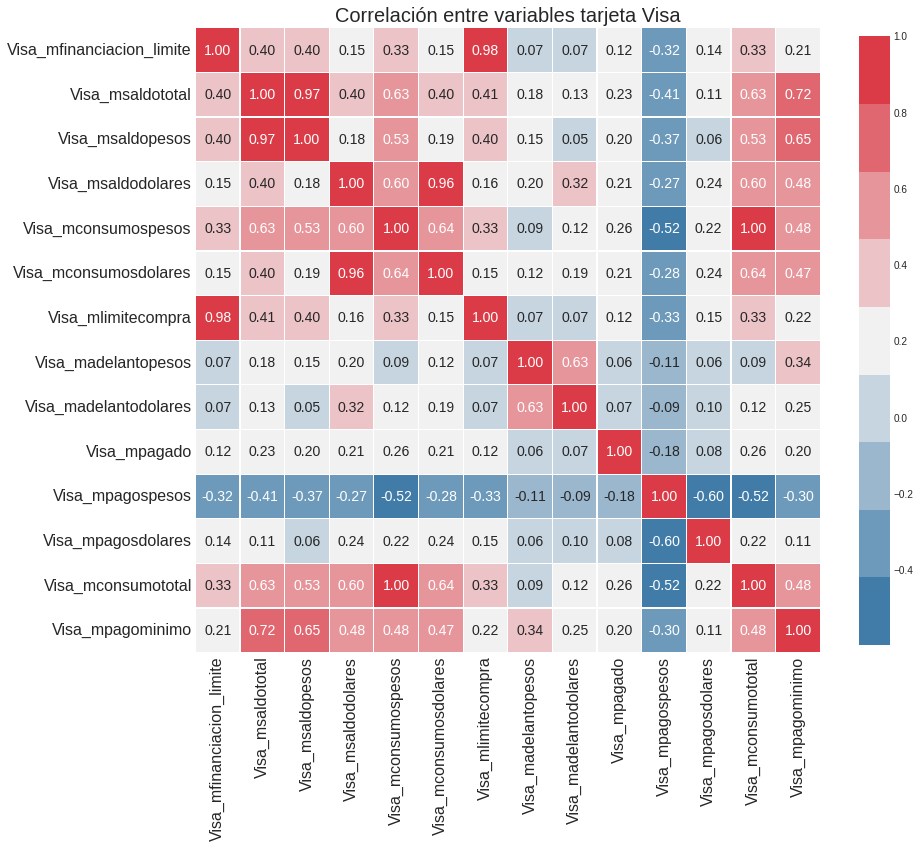

In [ ]:
plt.style.use("seaborn-white")

fig, ax = plt.subplots(figsize = (14, 14))

cmap = sns.diverging_palette(240, 10, n = 9, center = 'light')

sns.heatmap(corr_visa, linewidths =.2, cmap = cmap, cbar_kws = {"shrink": .8}, square = True, xticklabels = True, yticklabels = True, annot = True, annot_kws = {'size': 14}, fmt = '.2f');

plt.title("Correlación entre variables tarjeta Visa", fontsize = 20)
plt.yticks(fontsize =  16, rotation = 0) 
plt.xticks(fontsize = 16, rotation = 90)

plt.show()

In [ ]:
# SELECCIONAMOS AQUELLAS VARIABLES CON UNA CORRELACION MAYOR A 0.7 O MENOR A -0.7

for i in visa:
    for j in visa:
        if corr_visa[i] [j] !=1 and (corr_visa[i] [j] > 0.7 or corr_visa[i] [j] < -0.7):
            print(f'{i} - {j}: {round(corr_visa[i] [j], 2)}')

Visa_mfinanciacion_limite - Visa_mlimitecompra: 0.98
Visa_msaldototal - Visa_msaldopesos: 0.97
Visa_msaldototal - Visa_mpagominimo: 0.72
Visa_msaldopesos - Visa_msaldototal: 0.97
Visa_msaldodolares - Visa_mconsumosdolares: 0.96
Visa_mconsumosdolares - Visa_msaldodolares: 0.96
Visa_mlimitecompra - Visa_mfinanciacion_limite: 0.98
Visa_mpagominimo - Visa_msaldototal: 0.72


In [ ]:
# Se eliminan:
    # "Visa_mlimitecompra", "Visa_msaldopesos", "Visa_mpagominimo", "Visa_mconsumosdolares", "Visa_mconsumospesos", "Visa_mpagospesos"

visa_final = ['Visa_mfinanciacion_limite', 'Visa_msaldopesos', 'Visa_msaldodolares', 'Visa_madelantopesos', 
        'Visa_madelantodolares', 'Visa_mpagado', 'Visa_mpagosdolares', 'Visa_mconsumototal']

In [ ]:
# SE CORRE LA MATRIZ NUEVAMENTE PARA VERIFICAR QUE NO EXISTAN CORRELACIONES FUERTES

corr_visa_final = df3[visa_final].dropna().corr(method = 'pearson')

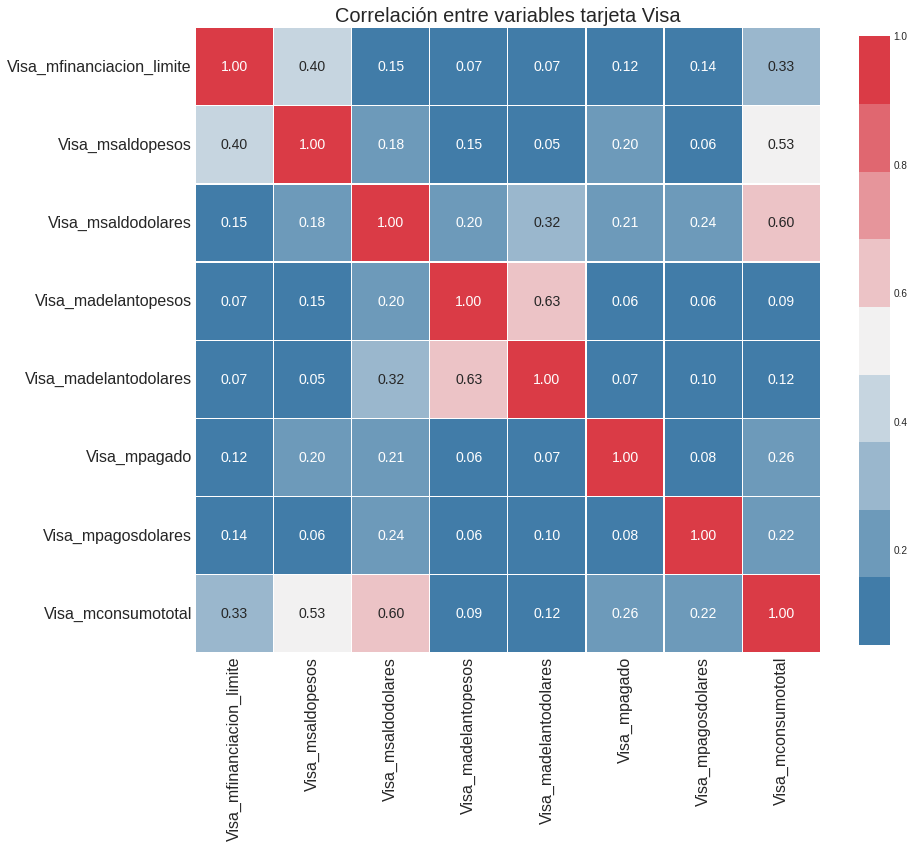

In [ ]:
plt.style.use("seaborn-white")

fig, ax = plt.subplots(figsize = (14, 14))

cmap = sns.diverging_palette(240, 10, n = 9, center = 'light')

sns.heatmap(corr_visa_final, linewidths =.2, cmap = cmap, cbar_kws = {"shrink": .8}, square = True, xticklabels = True, yticklabels = True, annot = True, annot_kws = {'size': 14}, fmt = '.2f');

plt.title("Correlación entre variables tarjeta Visa", fontsize = 20)
plt.yticks(fontsize =  16, rotation = 0) 
plt.xticks(fontsize = 16, rotation = 90)

plt.show()

In [ ]:
# Genero el drop

drop_11 = ["Visa_mlimitecompra", "Visa_msaldopesos", "Visa_mpagominimo", "Visa_mconsumosdolares", "Visa_mconsumospesos", "Visa_mpagospesos"]
df3 = df3.drop(drop_11, axis = 1)

In [ ]:
# VARIABLES RELACIONADAS CON TARJETA MASTER
# LA INTENCION ES GENERAR UN HEATMAP Y ELIMINAR CORRELACIONES
# SOLO CON VARIABLES NUMERICAS

variables_master = ['Master_marca_atraso', 'Master_cuenta_estado', 'Master_mfinanciacion_limite', 'Master_msaldototal',
                    'Master_msaldopesos', 'Master_msaldodolares', 'Master_mlimitecompra', 'Master_mpagado',
                    'Master_tconsumos', 'Master_tadelantosefectivo', 'Master_mpagominimo']

In [ ]:
# CORRO LA FUNCION PARA FIJARME QUÉ VARIABLES SON NUMÉRICAS
    # "Master_marca_atraso", "Master_cuenta_estado", "Master_tconsumos", "Master_tadelantosefectivo"
        # Estas variable son categóricas, por lo que no entran en el HEATMAP
unique_values(df3[variables_master])

Master_marca_atraso 
 [0. 1.] 

Master_cuenta_estado 
 [10. 11. 12. 19.] 

Master_mfinanciacion_limite 
 [0.00000000e+00 5.89680000e+02 7.37100000e+02 8.84520000e+02
 1.03194000e+03 1.10565000e+03 1.17936000e+03 1.32678000e+03
 1.47420000e+03 1.54791000e+03 1.76904000e+03 2.06388000e+03
 2.21130000e+03 2.27448000e+03 2.65356000e+03 2.84310000e+03
 3.09582000e+03 3.41172000e+03 3.98034000e+03 4.21200000e+03
 4.26465000e+03 5.11758000e+03 5.26500000e+03 5.54346000e+03
 5.97051000e+03 6.31800000e+03 6.63390000e+03 6.65262000e+03
 7.37100000e+03 7.89750000e+03 8.21340000e+03 8.42400000e+03
 9.05580000e+03 9.47700000e+03 1.00035000e+04 1.02141000e+04
 1.02667500e+04 1.05300000e+04 1.10565000e+04 1.15830000e+04
 1.23201000e+04 1.26360000e+04 1.42155000e+04 1.43208000e+04
 1.43734500e+04 1.47420000e+04 1.57950000e+04 1.64268000e+04
 1.86907500e+04 1.89540000e+04 2.00070000e+04 2.04282000e+04
 2.05335000e+04 2.13232500e+04 2.21130000e+04 2.27448000e+04
 2.31660000e+04 2.42190000e+04 2.46402000

In [ ]:
master = ['Master_mfinanciacion_limite', 'Master_msaldototal', 'Master_msaldopesos', 
          'Master_msaldodolares', 'Master_mlimitecompra', 'Master_mpagado', 'Master_mpagominimo']

In [ ]:
corr_master = df3[master].dropna().corr(method = 'pearson')

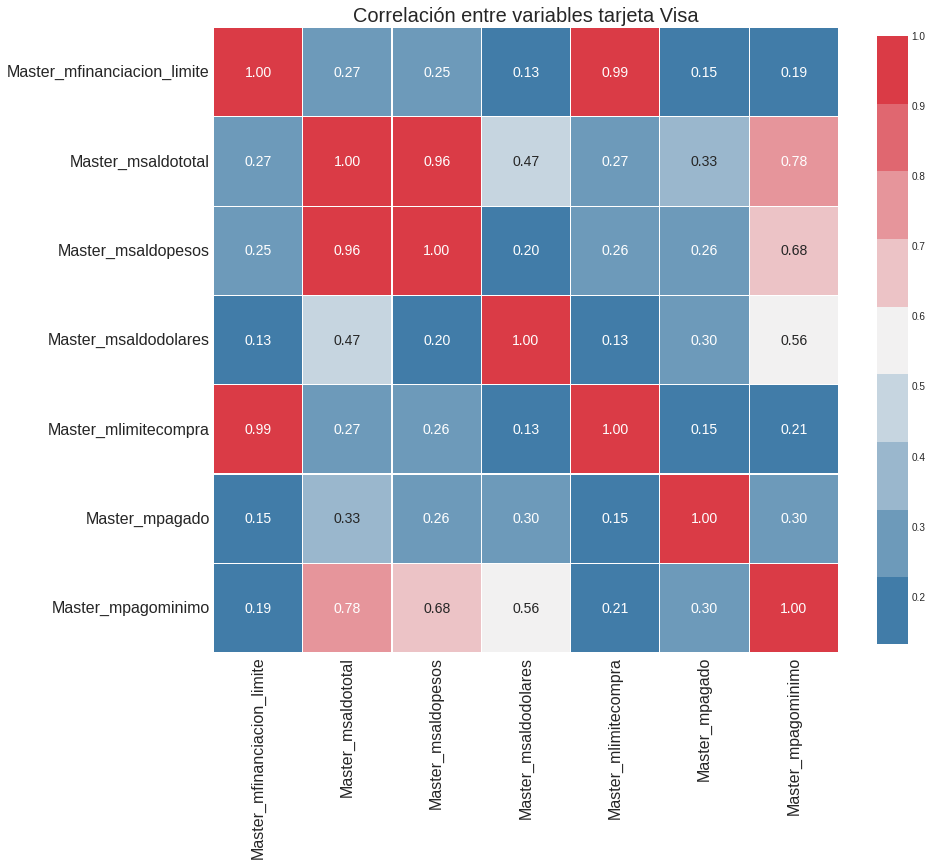

In [ ]:
plt.style.use("seaborn-white")

fig, ax = plt.subplots(figsize = (14, 14))

cmap = sns.diverging_palette(240, 10, n = 9, center = 'light')

sns.heatmap(corr_master, linewidths =.2, cmap = cmap, cbar_kws = {"shrink": .8}, square = True, xticklabels = True, yticklabels = True, annot = True, annot_kws = {'size': 14}, fmt = '.2f');

plt.title("Correlación entre variables tarjeta Visa", fontsize = 20)
plt.yticks(fontsize =  16, rotation = 0) 
plt.xticks(fontsize = 16, rotation = 90)

plt.show()

In [ ]:
# SELECCIONAMOS AQUELLAS VARIABLES CON UNA CORRELACION MAYOR A 0.7 O MENOR A -0.7

for i in master:
    for j in master:
        if corr_master[i] [j] !=1 and (corr_master[i] [j] > 0.7 or corr_master[i] [j] < -0.7):
            print(f'{i} - {j}: {round(corr_master[i] [j], 2)}')

Master_mfinanciacion_limite - Master_mlimitecompra: 0.99
Master_msaldototal - Master_msaldopesos: 0.96
Master_msaldototal - Master_mpagominimo: 0.78
Master_msaldopesos - Master_msaldototal: 0.96
Master_mlimitecompra - Master_mfinanciacion_limite: 0.99
Master_mpagominimo - Master_msaldototal: 0.78


In [ ]:
# Se eliminan:
    # "Master_mlimitecompra", "Master_msaldopesos", "Master_mpagominimo"

master_final = ['Master_mfinanciacion_limite', 'Master_msaldototal', 'Master_msaldodolares', 'Master_mpagado']

In [ ]:
# SE CORRE LA MATRIZ NUEVAMENTE PARA VERIFICAR QUE NO EXISTAN CORRELACIONES FUERTES

corr_master_final = df3[master_final].dropna().corr(method = 'pearson')

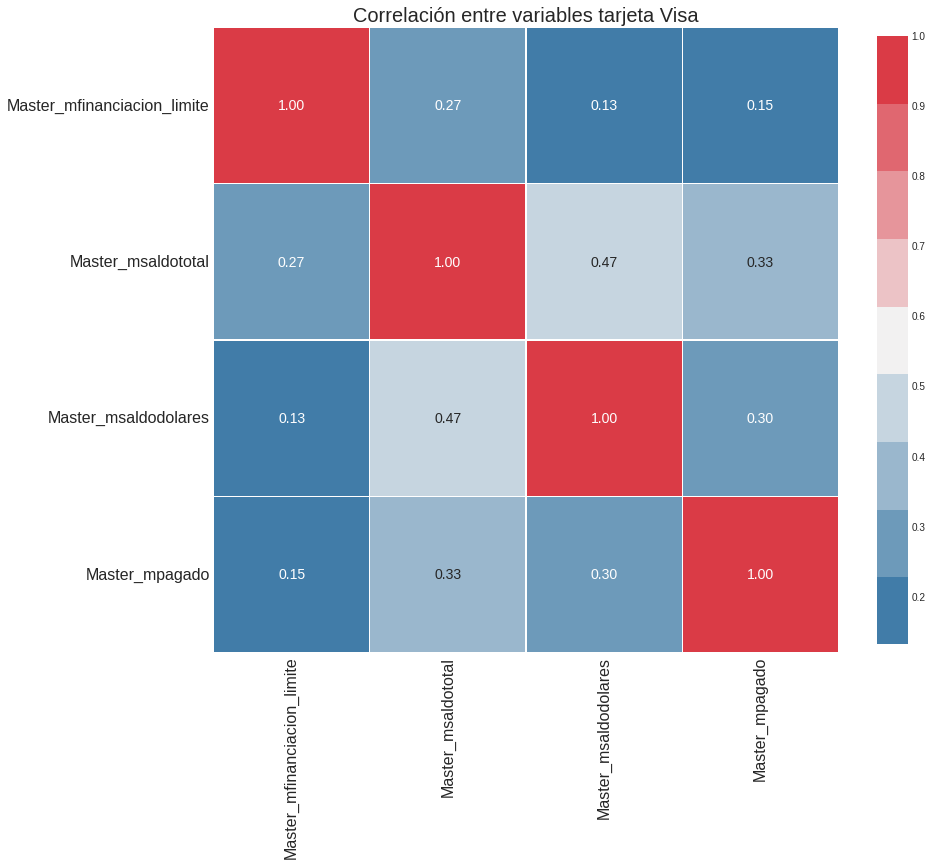

In [ ]:
plt.style.use("seaborn-white")

fig, ax = plt.subplots(figsize = (14, 14))

cmap = sns.diverging_palette(240, 10, n = 9, center = 'light')

sns.heatmap(corr_master_final, linewidths =.2, cmap = cmap, cbar_kws = {"shrink": .8}, square = True, xticklabels = True, yticklabels = True, annot = True, annot_kws = {'size': 14}, fmt = '.2f');

plt.title("Correlación entre variables tarjeta Visa", fontsize = 20)
plt.yticks(fontsize =  16, rotation = 0) 
plt.xticks(fontsize = 16, rotation = 90)

plt.show()

In [ ]:
# Genero el drop

drop_12 = ["Master_mlimitecompra", "Master_msaldopesos", "Master_mpagominimo"]
df3 = df3.drop(drop_12, axis = 1)

In [ ]:
# Unificamos los descuentos como "mdescuento"

df3["mdescuentos"] = df3["mcajeros_propios_descuentos"] + df3["mtarjeta_visa_descuentos"] + df3["mtarjeta_master_descuentos"] 

In [ ]:
# Genero el drop

drop_13 = ["mcajeros_propios_descuentos", "mtarjeta_visa_descuentos", "mtarjeta_master_descuentos"]
df3 = df3.drop(drop_13, axis = 1)

In [ ]:
# Se unifica como "tdescuento"

df3["tdescuento"] = np.where(df3[["ccajeros_propios_descuentos", "ctarjeta_visa_descuentos", "ctarjeta_master_descuentos"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_14 = ["ccajeros_propios_descuentos", "ctarjeta_visa_descuentos", "ctarjeta_master_descuentos"]
df3 = df3.drop(drop_14, axis = 1)

In [ ]:
# Unificamos los descuentos como "mcomision"

df3["mcomision"] = df3["mcomisiones_mantenimiento"] + df3["mcomisiones_otras"] 

In [ ]:
# Genero el drop

drop_15 = ["mcomisiones_mantenimiento", "mcomisiones_otras"]
df3 = df3.drop(drop_15, axis = 1)

In [ ]:
# Se unifica como "ccomision"

df3["ccomision"] = df3["ccomisiones_mantenimiento"] + df3["ccomisiones_otras"]

In [ ]:
# Genero el drop

drop_16 = ["ccomisiones_mantenimiento", "ccomisiones_otras"]
df3 = df3.drop(drop_16, axis = 1)

In [ ]:
# Con esto corroboro que puedo dropear la columna "tcambio_monedas" 

mask_tcambio = df3["tcambio_monedas"] == 1
mask_ccambio = (df3["ccambio_monedas_compra"] == 0) & (df3["ccambio_monedas_venta"] == 0)


df3[mask_tcambio & mask_ccambio]

,Unnamed: 0,numero_de_cliente,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ttarjeta_master,tcaja_seguridad,tplan_sueldo,mplan_sueldo,cplan_sueldo_transaccion,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_msaldototal,Master_msaldodolares,Master_mpagado,Master_tconsumos,Master_tadelantosefectivo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_msaldototal,Visa_msaldodolares,Visa_madelantopesos,Visa_madelantodolares,Visa_mpagado,Visa_mpagosdolares,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,target_bin,tdescubierto_preacordado,mcaja_ahorro_CC,mtarjeta_all_consumo,ctarjeta_all_transacciones,cprestamos_all,mprestamos_all,renta_dolar,renta_pesos,tpaquete,tcuenta,trenta,tseguro,tdebitos_automaticos,mdebitos_automaticos,mdescuentos,tdescuento,mcomision,ccomision


In [ ]:
df3 = df3.drop("tcambio_monedas", axis = 1)

In [ ]:
# Creamos "ccambio_venta_compra"

df3["ccambio_venta_compra"] = df3["ccambio_monedas_venta"] - df3["ccambio_monedas_compra"]

In [ ]:
# Genero el drop

drop_17 = ["ccambio_monedas_venta", "ccambio_monedas_compra"]
df3 = df3.drop(drop_17, axis = 1)

In [ ]:
# Creamos "mcambio_venta_compra"

df3["mcambio_venta_compra"] = df3["mcambio_monedas_venta"] - df3["mcambio_monedas_compra"]

In [ ]:
drop_18 = ["mcambio_monedas_venta", "mcambio_monedas_compra"]
df3 = df3.drop(drop_18, axis = 1)

In [ ]:
# Creamos "ctransferencia_emitida_recibida"

df3["ctransferencia_emitida_recibida"] = df3["ctransferencias_emitidas"] - df3["ctransferencias_recibidas"]

In [ ]:
# Genero el drop

drop_19 = ["ctransferencias_emitidas", "ctransferencias_recibidas"]
df3 = df3.drop(drop_19, axis = 1)

In [ ]:
# Creamos "mtransferencia_emitida_recibida"

df3["mtransferencia_emitida_recibida"] = df3["mtransferencias_emitidas"] - df3["mtransferencias_recibidas"]

In [ ]:
# Genero el drop

drop_20 = ["mtransferencias_emitidas", "mtransferencias_recibidas"]
df3 = df3.drop(drop_20, axis = 1)

In [ ]:
# Creamos "ccheques_emitido_depositado"

df3["ccheques_emitido_depositado"] = df3["ccheques_emitidos"] - df3["ccheques_depositados"]

In [ ]:
# Genero el drop

drop_21 = ["ccheques_emitidos", "ccheques_depositados"]
df3 = df3.drop(drop_21, axis = 1)

In [ ]:
# Creamos "mcheques_emitido_depositado"

df3["mcheques_emitido_depositado"] = df3["mcheques_emitidos"] - df3["mcheques_depositados"]

In [ ]:
# Genero el drop

drop_22 = ["mcheques_emitidos", "mcheques_depositados"]
df3 = df3.drop(drop_22, axis = 1)

In [ ]:
# Creamos "ccheques_emitido_depositado_r"

df3["ccheques_emitido_depositado_r"] = df3["ccheques_emitidos_rechazados"] - df3["ccheques_depositados_rechazados"]

In [ ]:
# Genero el drop

drop_23 = ["ccheques_emitidos_rechazados", "ccheques_depositados_rechazados"]
df3 = df3.drop(drop_23, axis = 1)

In [ ]:
# Creamos "mcheques_emitido_depositado_r"

df3["mcheques_emitido_depositado_r"] = df3["mcheques_emitidos_rechazados"] - df3["mcheques_depositados_rechazados"]

In [ ]:
# Genero el drop

drop_24 = ["mcheques_emitidos_rechazados", "mcheques_depositados_rechazados"]
df3 = df3.drop(drop_24, axis = 1)

In [ ]:
# Creamos "ttransacciones"

df3["ttransacciones"] = np.where(df3[["tcallcenter", "thomebanking", "tautoservicio"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_25 = ["tcallcenter", "thomebanking", "tautoservicio"]
df3 = df3.drop(drop_25, axis = 1)

In [ ]:
# Creamos "ctransacciones"

df3["ctransacciones"] = df3["ccallcenter_transacciones"] + df3["chomebanking_transacciones"] + df3["cautoservicio_transacciones"]

In [ ]:
# Genero el drop

drop_26 = ["ccallcenter_transacciones", "chomebanking_transacciones", "cautoservicio_transacciones"]
df3 = df3.drop(drop_26, axis = 1)

In [ ]:
# Creamos "tcajas_total"

df3["tcajas_total"] = np.where(df3[["tcajas", "tcajas_depositos", "tcajas_extracciones", "tcajas_otras"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_27 = ["tcajas", "tcajas_depositos", "tcajas_extracciones", "tcajas_otras"]
df3 = df3.drop(drop_27, axis = 1)

In [ ]:
# Creamos "tcajero_transaccion"

df3["tcajero_transaccion"] = np.where(df3[["ccajeros_propio_transacciones", "ccajeros_ajenos_transacciones"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_28 = ["ccajeros_propio_transacciones", "ccajeros_ajenos_transacciones"]
df3 = df3.drop(drop_28, axis = 1)

In [ ]:
# Creamos "mcajero_transaccion"

df3["mcajero_transaccion"] = df3["mcajeros_propio"] + df3["mcajeros_ajenos"]

In [ ]:
# Genero el drop

drop_29 = ["mcajeros_propio", "mcajeros_ajenos"]
df3 = df3.drop(drop_29, axis = 1)

In [ ]:
# Creamos "ttarjeta_visa_master"

df3["ttarjeta_visa_master"] = np.where(df3[["ttarjeta_visa", "ttarjeta_master"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_30 = ["ttarjeta_visa", "ttarjeta_master"]
df3 = df3.drop(drop_30, axis = 1)

In [ ]:
df3["mdescubierto_preacordado"]

4         1.17
5         1.17
6         1.17
7         1.17
8         1.17
          ... 
549858    0.00
549859    1.17
549860    1.17
549861    1.17
549862    1.17
Name: mdescubierto_preacordado, Length: 549859, dtype: float64

In [ ]:
df3["mdescubierto_preacordado"] = df3["mdescubierto_preacordado"].replace({1.17: 1})

In [ ]:
len(df3.columns)

79

In [ ]:
list(df3.columns)

['Unnamed: 0',
 'numero_de_cliente',
 'marketing_activo_ultimos90dias',
 'cliente_vip',
 'cliente_sucursal',
 'cliente_edad',
 'cliente_antiguedad',
 'mrentabilidad',
 'mrentabilidad_annual',
 'mcomisiones',
 'mactivos_margen',
 'mpasivos_margen',
 'marketing_coss_selling',
 'mcaja_ahorro_dolares',
 'mdescubierto_preacordado',
 'mcuentas_saldo',
 'ttarjeta_debito',
 'ctarjeta_debito_transacciones',
 'mautoservicio',
 'tcaja_seguridad',
 'tplan_sueldo',
 'mplan_sueldo',
 'cplan_sueldo_transaccion',
 'cextraccion_autoservicio',
 'mextraccion_autoservicio',
 'tmovimientos_ultimos90dias',
 'Master_marca_atraso',
 'Master_cuenta_estado',
 'Master_mfinanciacion_limite',
 'Master_msaldototal',
 'Master_msaldodolares',
 'Master_mpagado',
 'Master_tconsumos',
 'Master_tadelantosefectivo',
 'Visa_marca_atraso',
 'Visa_cuenta_estado',
 'Visa_mfinanciacion_limite',
 'Visa_msaldototal',
 'Visa_msaldodolares',
 'Visa_madelantopesos',
 'Visa_madelantodolares',
 'Visa_mpagado',
 'Visa_mpagosdolares',


In [ ]:
df4 = df3.copy()

In [ ]:
df4.columns

Index(['Unnamed: 0', 'numero_de_cliente', 'marketing_activo_ultimos90dias',
       'cliente_vip', 'cliente_sucursal', 'cliente_edad', 'cliente_antiguedad',
       'mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       'mactivos_margen', 'mpasivos_margen', 'marketing_coss_selling',
       'mcaja_ahorro_dolares', 'mdescubierto_preacordado', 'mcuentas_saldo',
       'ttarjeta_debito', 'ctarjeta_debito_transacciones', 'mautoservicio',
       'tcaja_seguridad', 'tplan_sueldo', 'mplan_sueldo',
       'cplan_sueldo_transaccion', 'cextraccion_autoservicio',
       'mextraccion_autoservicio', 'tmovimientos_ultimos90dias',
       'Master_marca_atraso', 'Master_cuenta_estado',
       'Master_mfinanciacion_limite', 'Master_msaldototal',
       'Master_msaldodolares', 'Master_mpagado', 'Master_tconsumos',
       'Master_tadelantosefectivo', 'Visa_marca_atraso', 'Visa_cuenta_estado',
       'Visa_mfinanciacion_limite', 'Visa_msaldototal', 'Visa_msaldodolares',
       'Visa_madelantopesos', '

In [ ]:
# Creamos una lista con todas las variables numéricas

numericas = ["cliente_edad", "cliente_antiguedad", "mrentabilidad", "mrentabilidad_annual", "mcomisiones",
             "mactivos_margen", "mpasivos_margen", "mcaja_ahorro_dolares", "mcuentas_saldo", 
             "ctarjeta_debito_transacciones", "mautoservicio", "mplan_sueldo", "cplan_sueldo_transaccion",
            "cextraccion_autoservicio", "mextraccion_autoservicio", "Master_mfinanciacion_limite",
            "Master_msaldototal", "Master_msaldodolares", "Master_mpagado", "Visa_mfinanciacion_limite",
            "Visa_msaldototal", "Visa_msaldodolares", "Visa_madelantopesos", "Visa_madelantodolares",
            "Visa_mpagado", "Visa_mpagosdolares", "Visa_mconsumototal", "mcaja_ahorro_CC", "mtarjeta_all_consumo",
            "cprestamos_all", "mprestamos_all", "renta_dolar", "renta_pesos", "mdebitos_automaticos",
            "mdescuentos", "mcomision", "ccomision", "ccambio_venta_compra", "mcambio_venta_compra", 
            "ctransferencia_emitida_recibida", "mtransferencia_emitida_recibida", "ccheques_emitido_depositado",
            "mcheques_emitido_depositado", "ccheques_emitido_depositado_r", "mcheques_emitido_depositado_r",
            "ctransacciones", "mcajero_transaccion", "ctarjeta_all_transacciones"]

In [ ]:
categoricas = ["marketing_activo_ultimos90dias", "cliente_vip", "cliente_sucursal", "marketing_coss_selling",
               "mdescubierto_preacordado", "ttarjeta_debito", "tcaja_seguridad", "tplan_sueldo",
               "tmovimientos_ultimos90dias", "Master_marca_atraso", "Master_cuenta_estado", "Master_tconsumos",
               "Master_tadelantosefectivo", "Visa_marca_atraso", "Visa_cuenta_estado", "Visa_tconsumos",
               "Visa_tadelantosefectivo", "tdescubierto_preacordado", "tpaquete",
               "tcuenta", "trenta", "tseguro", "tdebitos_automaticos", "tdescuento", "ttransacciones", "tcajas_total",
               "tcajero_transaccion", "ttarjeta_visa_master"]

## 3. Dummies

### A. marketing_coss_selling

In [ ]:
df4["marketing_coss_selling"] = df4["marketing_coss_selling"].astype("str")

In [ ]:
df4[df4["target_bin"] == 1]["marketing_coss_selling"].value_counts().sort_values(ascending = False).head()

7    157
6    132
8    119
5     94
9     75
Name: marketing_coss_selling, dtype: int64

In [ ]:
list_marketing_coss_selling = ["7", "6", "8", "5", "9"]

In [ ]:
mask_marketing_coss_selling = df4["marketing_coss_selling"].isin(list_marketing_coss_selling) == False

In [ ]:
df4["marketing_coss_selling"][mask_marketing_coss_selling] = "otros"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4["marketing_coss_selling"].unique()

array(['8', '9', 'otros', '6', '7', '5'], dtype=object)

In [ ]:
df4[df4["target_bin"] == 1]["marketing_coss_selling"].value_counts().sort_values(ascending = False)

otros    196
7        157
6        132
8        119
5         94
9         75
Name: marketing_coss_selling, dtype: int64

### B. cliente_sucursal

In [ ]:
df4["cliente_sucursal"] = df4["cliente_sucursal"].astype("str")

In [ ]:
df4[df4["target_bin"] == 1]["cliente_sucursal"].value_counts().sort_values(ascending = False).head(10)

2       21
209     12
422     11
545     10
50       9
941      9
548      9
128      8
227      7
1436     7
Name: cliente_sucursal, dtype: int64

In [ ]:
list_cliente_sucursal = ["2", "209", "422", "545", "50", "941", "548", "128", "227", "1436"]

In [ ]:
mask_cliente_sucursal = df4["cliente_sucursal"].isin(list_cliente_sucursal) == False

In [ ]:
df4["cliente_sucursal"][mask_cliente_sucursal] = "otros"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4["cliente_sucursal"].unique()

array(['otros', '227', '545', '50', '2', '941', '1436', '128', '209',
       '422', '548'], dtype=object)

In [ ]:
df4[df4["target_bin"] == 1]["cliente_sucursal"].value_counts().sort_values(ascending = False)

otros    670
2         21
209       12
422       11
545       10
548        9
941        9
50         9
128        8
227        7
1436       7
Name: cliente_sucursal, dtype: int64

### C. cliente_edad

In [ ]:
bins_edad = [0,20,40,60,80,110]
labels_edad = ['<20','21-40','41-60','61-80','>80']
df4['edad_bin'] = pd.cut(df4['cliente_edad'], bins = bins_edad, labels = labels_edad, right=False)

In [ ]:
df4['edad_bin'].unique()

['61-80', '41-60', '21-40', '>80', '<20']
Categories (5, object): ['<20' < '21-40' < '41-60' < '61-80' < '>80']

In [ ]:
df4['edad_bin'] = df4['edad_bin'].astype("str")

### D. cliente_antiguedad

In [ ]:
bins_antiguedad = [0,20,40,60,80,110]
labels_antiguedad = ['<20','21-40','41-60','61-80','>80']
df4['antiq_bin'] = pd.cut(df4['cliente_antiguedad'], bins = bins_antiguedad, labels = labels_antiguedad, right = False)

In [ ]:
df4['antiq_bin'].unique()

[NaN, '>80', '41-60', '<20', '61-80', '21-40']
Categories (5, object): ['<20' < '21-40' < '41-60' < '61-80' < '>80']

In [ ]:
df4['antiq_bin'] = df4['antiq_bin'].astype("str")

### E. Creo las dummies

In [ ]:
df4[["Master_cuenta_estado", "Visa_cuenta_estado"]] =  df4[["Master_cuenta_estado", "Visa_cuenta_estado"]].astype("str")

In [ ]:
para_encoder = ["edad_bin", "antiq_bin", "cliente_sucursal", "marketing_coss_selling", "Master_cuenta_estado", "Visa_cuenta_estado"]

In [ ]:
df4[para_encoder].dtypes

edad_bin                  object
antiq_bin                 object
cliente_sucursal          object
marketing_coss_selling    object
Master_cuenta_estado      object
Visa_cuenta_estado        object
dtype: object

In [ ]:
enc = OneHotEncoder(drop = "first")
X = df4[para_encoder]
enc.fit(X)
enc.categories_

[array(['21-40', '41-60', '61-80', '<20', '>80'], dtype=object),
 array(['21-40', '41-60', '61-80', '<20', '>80', 'nan'], dtype=object),
 array(['128', '1436', '2', '209', '227', '422', '50', '545', '548', '941',
        'otros'], dtype=object),
 array(['5', '6', '7', '8', '9', 'otros'], dtype=object),
 array(['10.0', '11.0', '12.0', '19.0'], dtype=object),
 array(['10.0', '11.0', '12.0', '19.0'], dtype=object)]

In [ ]:
dummies = enc.transform(X).toarray()

In [ ]:
dummies_df = pd.DataFrame(dummies)
dummies_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
col_names = [para_encoder[i] + '_' + enc.categories_[i] for i in range(len(para_encoder))] 
col_names

[array(['edad_bin_21-40', 'edad_bin_41-60', 'edad_bin_61-80',
        'edad_bin_<20', 'edad_bin_>80'], dtype=object),
 array(['antiq_bin_21-40', 'antiq_bin_41-60', 'antiq_bin_61-80',
        'antiq_bin_<20', 'antiq_bin_>80', 'antiq_bin_nan'], dtype=object),
 array(['cliente_sucursal_128', 'cliente_sucursal_1436',
        'cliente_sucursal_2', 'cliente_sucursal_209',
        'cliente_sucursal_227', 'cliente_sucursal_422',
        'cliente_sucursal_50', 'cliente_sucursal_545',
        'cliente_sucursal_548', 'cliente_sucursal_941',
        'cliente_sucursal_otros'], dtype=object),
 array(['marketing_coss_selling_5', 'marketing_coss_selling_6',
        'marketing_coss_selling_7', 'marketing_coss_selling_8',
        'marketing_coss_selling_9', 'marketing_coss_selling_otros'],
       dtype=object),
 array(['Master_cuenta_estado_10.0', 'Master_cuenta_estado_11.0',
        'Master_cuenta_estado_12.0', 'Master_cuenta_estado_19.0'],
       dtype=object),
 array(['Visa_cuenta_estado_10.0', 'Visa

In [ ]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

['edad_bin_41-60',
 'edad_bin_61-80',
 'edad_bin_<20',
 'edad_bin_>80',
 'antiq_bin_41-60',
 'antiq_bin_61-80',
 'antiq_bin_<20',
 'antiq_bin_>80',
 'antiq_bin_nan',
 'cliente_sucursal_1436',
 'cliente_sucursal_2',
 'cliente_sucursal_209',
 'cliente_sucursal_227',
 'cliente_sucursal_422',
 'cliente_sucursal_50',
 'cliente_sucursal_545',
 'cliente_sucursal_548',
 'cliente_sucursal_941',
 'cliente_sucursal_otros',
 'marketing_coss_selling_6',
 'marketing_coss_selling_7',
 'marketing_coss_selling_8',
 'marketing_coss_selling_9',
 'marketing_coss_selling_otros',
 'Master_cuenta_estado_11.0',
 'Master_cuenta_estado_12.0',
 'Master_cuenta_estado_19.0',
 'Visa_cuenta_estado_11.0',
 'Visa_cuenta_estado_12.0',
 'Visa_cuenta_estado_19.0']

In [ ]:
dummies_df.columns = col_names_drop_first
dummies_df.head()

,edad_bin_41-60,edad_bin_61-80,edad_bin_<20,edad_bin_>80,antiq_bin_41-60,antiq_bin_61-80,antiq_bin_<20,antiq_bin_>80,antiq_bin_nan,cliente_sucursal_1436,cliente_sucursal_2,cliente_sucursal_209,cliente_sucursal_227,cliente_sucursal_422,cliente_sucursal_50,cliente_sucursal_545,cliente_sucursal_548,cliente_sucursal_941,cliente_sucursal_otros,marketing_coss_selling_6,marketing_coss_selling_7,marketing_coss_selling_8,marketing_coss_selling_9,marketing_coss_selling_otros,Master_cuenta_estado_11.0,Master_cuenta_estado_12.0,Master_cuenta_estado_19.0,Visa_cuenta_estado_11.0,Visa_cuenta_estado_12.0,Visa_cuenta_estado_19.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Arreglar porque agrega filas!!
df4 = pd.concat([df4["numero_de_cliente"].reset_index(drop=True), df4[numericas].reset_index(drop=True), df4[categoricas].reset_index(drop=True), dummies_df.reset_index(drop=True), df4["target_bin"].reset_index(drop=True)], axis = 1)

In [ ]:
df4['target_bin'].unique()

array([0, 1])

In [ ]:
df4.shape

(549859, 108)

In [ ]:
df4.columns

Index(['numero_de_cliente', 'cliente_edad', 'cliente_antiguedad',
       'mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       'mactivos_margen', 'mpasivos_margen', 'mcaja_ahorro_dolares',
       'mcuentas_saldo',
       ...
       'marketing_coss_selling_8', 'marketing_coss_selling_9',
       'marketing_coss_selling_otros', 'Master_cuenta_estado_11.0',
       'Master_cuenta_estado_12.0', 'Master_cuenta_estado_19.0',
       'Visa_cuenta_estado_11.0', 'Visa_cuenta_estado_12.0',
       'Visa_cuenta_estado_19.0', 'target_bin'],
      dtype='object', length=108)

In [ ]:
df4 = df4.drop(["marketing_coss_selling", "cliente_sucursal", "Master_cuenta_estado", "Visa_cuenta_estado"], axis = 1)

In [ ]:
df4['target_bin'].unique()

array([0, 1])

In [ ]:
df4.head()

,numero_de_cliente,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,mcaja_ahorro_dolares,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,mplan_sueldo,cplan_sueldo_transaccion,cextraccion_autoservicio,mextraccion_autoservicio,Master_mfinanciacion_limite,Master_msaldototal,Master_msaldodolares,Master_mpagado,Visa_mfinanciacion_limite,Visa_msaldototal,Visa_msaldodolares,Visa_madelantopesos,Visa_madelantodolares,Visa_mpagado,Visa_mpagosdolares,Visa_mconsumototal,mcaja_ahorro_CC,mtarjeta_all_consumo,cprestamos_all,mprestamos_all,renta_dolar,renta_pesos,mdebitos_automaticos,mdescuentos,mcomision,ccomision,ccambio_venta_compra,mcambio_venta_compra,ctransferencia_emitida_recibida,mtransferencia_emitida_recibida,ccheques_emitido_depositado,mcheques_emitido_depositado,ccheques_emitido_depositado_r,mcheques_emitido_depositado_r,ctransacciones,mcajero_transaccion,ctarjeta_all_transacciones,marketing_activo_ultimos90dias,cliente_vip,mdescubierto_preacordado,ttarjeta_debito,tcaja_seguridad,tplan_sueldo,tmovimientos_ultimos90dias,Master_marca_atraso,Master_tconsumos,Master_tadelantosefectivo,Visa_marca_atraso,Visa_tconsumos,Visa_tadelantosefectivo,tdescubierto_preacordado,tpaquete,tcuenta,trenta,tseguro,tdebitos_automaticos,tdescuento,ttransacciones,tcajas_total,tcajero_transaccion,ttarjeta_visa_master,edad_bin_41-60,edad_bin_61-80,edad_bin_<20,edad_bin_>80,antiq_bin_41-60,antiq_bin_61-80,antiq_bin_<20,antiq_bin_>80,antiq_bin_nan,cliente_sucursal_1436,cliente_sucursal_2,cliente_sucursal_209,cliente_sucursal_227,cliente_sucursal_422,cliente_sucursal_50,cliente_sucursal_545,cliente_sucursal_548,cliente_sucursal_941,cliente_sucursal_otros,marketing_coss_selling_6,marketing_coss_selling_7,marketing_coss_selling_8,marketing_coss_selling_9,marketing_coss_selling_otros,Master_cuenta_estado_11.0,Master_cuenta_estado_12.0,Master_cuenta_estado_19.0,Visa_cuenta_estado_11.0,Visa_cuenta_estado_12.0,Visa_cuenta_estado_19.0,target_bin
0,5609788,61.0,237,0.00,9669.42,0.00,0.00,0.00,0.0,1214.93,0,0.0,0.0,0,0,0.0,86544.25,5930.00,0.0,5930.00,87488.34,4765.27,0.00,0.0,0.0,0.00,1467.03,377.24,2306.92,11333.44,0,0.0,0.0,0.0,225.14,0.0,854.19,6,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,17,0.0,0,1.0,1,0,0,1,0.0,0,0,0.0,1,0,1,0,1,0,0,1,1,0,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5609788,61.0,238,229.62,9681.11,761.61,-519.61,64.92,0.0,965.42,0,0.0,0.0,0,0,0.0,87621.61,5919.28,0.0,5919.28,88854.48,4626.20,0.00,0.0,0.0,0.00,0.00,225.14,1243.55,11181.13,0,0.0,0.0,0.0,225.14,0.0,1214.53,7,0,0.0,0,0.0,0,0.0,0,0.0,35,0.0,16,1.0,0,1.0,1,0,0,1,0.0,0,0,0.0,1,0,1,0,1,0,0,1,0,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5609788,62.0,239,-83.11,8931.04,395.03,-482.88,74.20,0.0,800.80,0,0.0,0.0,0,0,0.0,88865.58,5908.69,0.0,5908.69,88871.12,5885.45,42.02,0.0,0.0,0.00,0.00,266.80,4425.95,12609.13,0,0.0,0.0,0.0,225.14,0.0,791.56,6,0,0.0,0,0.0,0,0.0,0,0.0,18,0.0,18,1.0,0,1.0,1,0,0,1,0.0,0,0,0.0,1,0,1,0,1,0,0,1,1,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5609981,64.0,196,0.00,4107.16,0.00,0.00,0.00,0.0,1061.04,0,0.0,0.0,0,0,0.0,9477.00,0.00,0.0,0.00,15795.00,6505.05,0.00,0.0,0.0,0.00,0.00,706.14,1568.13,706.14,0,0.0,0.0,0.0,717.82,0.0,482.24,6,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.0,0,1.0,1,0,0,1,0.0,1,1,0.0,1,0,1,0,1,0,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5609981,64.0,197,316.04,4515.55,231.05,52.40,20.24,0.0,30.33,0,0.0,0.0,0,0,0.0,9477.00,0.00,0.0,0.00,15795.00,6867.33,0.00,0.0,0.0,8034.77,0.00,705.51,557.46,705.51,0,0.0,0.0,0.0,717.19,0.0,489.50,6,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,1.0,0,1.0,1,0,0,1,0.0,1,1,0.0,1,0,1,0,1,0,0,1,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
df4.columns

Index(['numero_de_cliente', 'cliente_edad', 'cliente_antiguedad',
       'mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       'mactivos_margen', 'mpasivos_margen', 'mcaja_ahorro_dolares',
       'mcuentas_saldo',
       ...
       'marketing_coss_selling_8', 'marketing_coss_selling_9',
       'marketing_coss_selling_otros', 'Master_cuenta_estado_11.0',
       'Master_cuenta_estado_12.0', 'Master_cuenta_estado_19.0',
       'Visa_cuenta_estado_11.0', 'Visa_cuenta_estado_12.0',
       'Visa_cuenta_estado_19.0', 'target_bin'],
      dtype='object', length=104)

In [ ]:
df4.shape

(549859, 104)

## 3.6 Procesamiento estadístico
Procesamos las columnas `float` e `int` para dejar aquellas que puedan tener alguna significancia estadística (se sube el valor significativoi de p a 0.1)

In [ ]:
df4.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
# Crea una lista de las variables que son float

col_numericas_float = df4.select_dtypes(include = ['float']).columns

# Número inicial de columnas float
len(col_numericas_float)

70

In [ ]:
# Hacemos el proceamiento estadístico con un t test
col_numericas_float_in = []
for i in col_numericas_float:
    statistic, pvalue = stats.ttest_ind(df4[i][df4['target_bin'] == True], df4[i][df4['target_bin'] == False])
    if pvalue < 0.1:
        print(f'Para {i} el valor de p <0.1 = {pvalue}')
        col_numericas_float_in.append(i)

Para mrentabilidad el valor de p <0.1 = 3.238003299880561e-27
Para mrentabilidad_annual el valor de p <0.1 = 2.6125186595999236e-12
Para mcomisiones el valor de p <0.1 = 1.7416268962916703e-52
Para mactivos_margen el valor de p <0.1 = 0.034410115575780276
Para mpasivos_margen el valor de p <0.1 = 3.3505050054567757e-16
Para mcaja_ahorro_dolares el valor de p <0.1 = 0.04116567007435488
Para mcuentas_saldo el valor de p <0.1 = 1.1580368799555126e-08
Para mautoservicio el valor de p <0.1 = 3.7333973666365664e-17
Para mplan_sueldo el valor de p <0.1 = 1.7490208393898584e-09
Para mextraccion_autoservicio el valor de p <0.1 = 1.3859821401646022e-48
Para Master_mfinanciacion_limite el valor de p <0.1 = 4.622676026417276e-47
Para Master_msaldodolares el valor de p <0.1 = 0.0029985766691098723
Para Master_mpagado el valor de p <0.1 = 0.001772930193172065
Para Visa_mfinanciacion_limite el valor de p <0.1 = 8.878562357079141e-44
Para Visa_msaldototal el valor de p <0.1 = 0.006785312981189553
Para

In [ ]:
# Número final de columnas float

len(col_numericas_float_in)

57

In [ ]:
col_numericas_float_in

['mrentabilidad',
 'mrentabilidad_annual',
 'mcomisiones',
 'mactivos_margen',
 'mpasivos_margen',
 'mcaja_ahorro_dolares',
 'mcuentas_saldo',
 'mautoservicio',
 'mplan_sueldo',
 'mextraccion_autoservicio',
 'Master_mfinanciacion_limite',
 'Master_msaldodolares',
 'Master_mpagado',
 'Visa_mfinanciacion_limite',
 'Visa_msaldototal',
 'Visa_msaldodolares',
 'Visa_madelantopesos',
 'Visa_madelantodolares',
 'Visa_mpagado',
 'Visa_mpagosdolares',
 'Visa_mconsumototal',
 'mcaja_ahorro_CC',
 'mtarjeta_all_consumo',
 'mprestamos_all',
 'renta_dolar',
 'mdebitos_automaticos',
 'mdescuentos',
 'mcomision',
 'mcambio_venta_compra',
 'mtransferencia_emitida_recibida',
 'mcheques_emitido_depositado',
 'mcheques_emitido_depositado_r',
 'mcajero_transaccion',
 'marketing_activo_ultimos90dias',
 'mdescubierto_preacordado',
 'Master_marca_atraso',
 'Visa_marca_atraso',
 'edad_bin_>80',
 'antiq_bin_<20',
 'antiq_bin_nan',
 'cliente_sucursal_1436',
 'cliente_sucursal_209',
 'cliente_sucursal_422',
 'cli

In [ ]:
col_numericas_int = df4.select_dtypes(include = ['int']).columns

In [ ]:
# Número in inicial de columnas int
len(col_numericas_int)

34

In [ ]:
# Hacemos el proceamiento estadístico con un t test
col_numericas_int_in = []
for i in col_numericas_int:
    statistic, pvalue = stats.ttest_ind(df4[i][df4['target_bin'] == True], df4[i][df4['target_bin'] == False])
    if pvalue < 0.1:
        print(f'Para {i} el valor de p <0.1 = {pvalue}')
        col_numericas_int_in.append(i)

Para numero_de_cliente el valor de p <0.1 = 3.1506248811105875e-28
Para cliente_antiguedad el valor de p <0.1 = 1.0048836908138068e-34
Para ctarjeta_debito_transacciones el valor de p <0.1 = 1.8115264832403732e-52
Para cextraccion_autoservicio el valor de p <0.1 = 1.3824990381928432e-58
Para cprestamos_all el valor de p <0.1 = 0.031123547894987343
Para ccomision el valor de p <0.1 = 1.0030139346491994e-60
Para ccambio_venta_compra el valor de p <0.1 = 9.23282890001845e-11
Para ctransferencia_emitida_recibida el valor de p <0.1 = 9.743034490575527e-09
Para ccheques_emitido_depositado el valor de p <0.1 = 6.154742808808844e-07
Para ccheques_emitido_depositado_r el valor de p <0.1 = 4.184525147797469e-45
Para ctransacciones el valor de p <0.1 = 2.613513399608874e-57
Para ctarjeta_all_transacciones el valor de p <0.1 = 6.683107310519016e-129
Para ttarjeta_debito el valor de p <0.1 = 8.07127557064151e-06
Para tcaja_seguridad el valor de p <0.1 = 7.074662799818904e-17
Para tplan_sueldo el va

In [ ]:
# Número final de columnas int
len(col_numericas_int_in)

31

In [ ]:
df4.shape # 12 + 4 = 16 → 88

(549859, 104)

In [ ]:
df_final = pd.concat([df4[col_numericas_float_in], df4[col_numericas_int_in]], axis = 1)

In [ ]:
df_final.shape

(549859, 88)

In [ ]:
df_final.head()

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,mcaja_ahorro_dolares,mcuentas_saldo,mautoservicio,mplan_sueldo,mextraccion_autoservicio,Master_mfinanciacion_limite,Master_msaldodolares,Master_mpagado,Visa_mfinanciacion_limite,Visa_msaldototal,Visa_msaldodolares,Visa_madelantopesos,Visa_madelantodolares,Visa_mpagado,Visa_mpagosdolares,Visa_mconsumototal,mcaja_ahorro_CC,mtarjeta_all_consumo,mprestamos_all,renta_dolar,mdebitos_automaticos,mdescuentos,mcomision,mcambio_venta_compra,mtransferencia_emitida_recibida,mcheques_emitido_depositado,mcheques_emitido_depositado_r,mcajero_transaccion,marketing_activo_ultimos90dias,mdescubierto_preacordado,Master_marca_atraso,Visa_marca_atraso,edad_bin_>80,antiq_bin_<20,antiq_bin_nan,cliente_sucursal_1436,cliente_sucursal_209,cliente_sucursal_422,cliente_sucursal_545,cliente_sucursal_941,cliente_sucursal_otros,marketing_coss_selling_6,marketing_coss_selling_7,marketing_coss_selling_8,marketing_coss_selling_9,marketing_coss_selling_otros,Master_cuenta_estado_11.0,Master_cuenta_estado_12.0,Master_cuenta_estado_19.0,Visa_cuenta_estado_11.0,Visa_cuenta_estado_12.0,Visa_cuenta_estado_19.0,numero_de_cliente,cliente_antiguedad,ctarjeta_debito_transacciones,cextraccion_autoservicio,cprestamos_all,ccomision,ccambio_venta_compra,ctransferencia_emitida_recibida,ccheques_emitido_depositado,ccheques_emitido_depositado_r,ctransacciones,ctarjeta_all_transacciones,ttarjeta_debito,tcaja_seguridad,tplan_sueldo,tmovimientos_ultimos90dias,Master_tadelantosefectivo,Visa_tconsumos,Visa_tadelantosefectivo,tdescubierto_preacordado,tpaquete,tcuenta,trenta,tseguro,tdebitos_automaticos,tdescuento,ttransacciones,tcajas_total,tcajero_transaccion,ttarjeta_visa_master,target_bin
0,0.00,9669.42,0.00,0.00,0.00,0.0,1214.93,0.0,0.0,0.0,86544.25,0.0,5930.00,87488.34,4765.27,0.00,0.0,0.0,0.00,1467.03,377.24,2306.92,11333.44,0.0,0.0,225.14,0.0,854.19,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5609788,237,0,0,0,6,0,0,0,0,0,17,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0
1,229.62,9681.11,761.61,-519.61,64.92,0.0,965.42,0.0,0.0,0.0,87621.61,0.0,5919.28,88854.48,4626.20,0.00,0.0,0.0,0.00,0.00,225.14,1243.55,11181.13,0.0,0.0,225.14,0.0,1214.53,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5609788,238,0,0,0,7,0,0,0,0,35,16,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0
2,-83.11,8931.04,395.03,-482.88,74.20,0.0,800.80,0.0,0.0,0.0,88865.58,0.0,5908.69,88871.12,5885.45,42.02,0.0,0.0,0.00,0.00,266.80,4425.95,12609.13,0.0,0.0,225.14,0.0,791.56,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5609788,239,0,0,0,6,0,0,0,0,18,18,1,0,0,1,0,1,0,1,0,1,0,0,1,1,1,1,0,1,0
3,0.00,4107.16,0.00,0.00,0.00,0.0,1061.04,0.0,0.0,0.0,9477.00,0.0,0.00,15795.00,6505.05,0.00,0.0,0.0,0.00,0.00,706.14,1568.13,706.14,0.0,0.0,717.82,0.0,482.24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5609981,196,0,0,0,6,0,0,0,0,0,2,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0
4,316.04,4515.55,231.05,52.40,20.24,0.0,30.33,0.0,0.0,0.0,9477.00,0.0,0.00,15795.00,6867.33,0.00,0.0,0.0,8034.77,0.00,705.51,557.46,705.51,0.0,0.0,717.19,0.0,489.50,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5609981,197,0,0,0,6,0,0,0,0,0,2,1,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
df_final.columns

Index(['mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       'mactivos_margen', 'mpasivos_margen', 'mcaja_ahorro_dolares',
       'mcuentas_saldo', 'mautoservicio', 'mplan_sueldo',
       'mextraccion_autoservicio', 'Master_mfinanciacion_limite',
       'Master_msaldodolares', 'Master_mpagado', 'Visa_mfinanciacion_limite',
       'Visa_msaldototal', 'Visa_msaldodolares', 'Visa_madelantopesos',
       'Visa_madelantodolares', 'Visa_mpagado', 'Visa_mpagosdolares',
       'Visa_mconsumototal', 'mcaja_ahorro_CC', 'mtarjeta_all_consumo',
       'mprestamos_all', 'renta_dolar', 'mdebitos_automaticos', 'mdescuentos',
       'mcomision', 'mcambio_venta_compra', 'mtransferencia_emitida_recibida',
       'mcheques_emitido_depositado', 'mcheques_emitido_depositado_r',
       'mcajero_transaccion', 'marketing_activo_ultimos90dias',
       'mdescubierto_preacordado', 'Master_marca_atraso', 'Visa_marca_atraso',
       'edad_bin_>80', 'antiq_bin_<20', 'antiq_bin_nan',
       'cliente_sucursa

In [ ]:
df_final.to_csv("/content/drive/My Drive/DataScience/Banco/banco_to_model.csv")

In [ ]:
final_date = datetime.now()
print((final_date-inicial_date)/60)

0:00:02.213572
